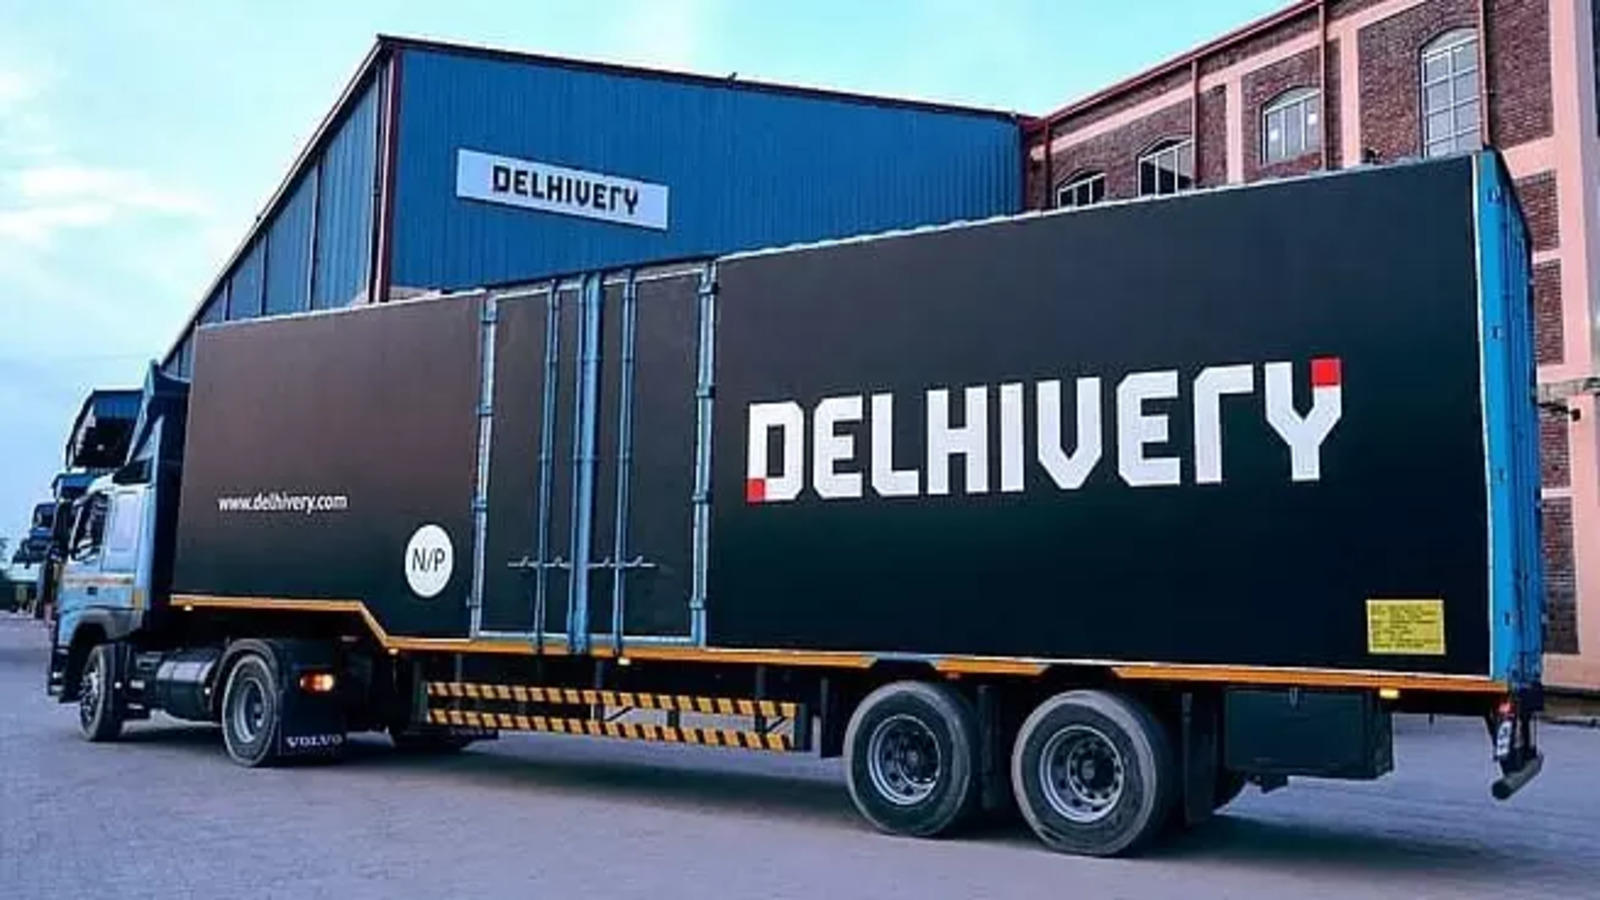

# Delhivery - Feature Engineering

## Introduction:

Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating
the commerce operating system.
They achieve this by utilizing world-class infrastructure, ensuring the highest quality in
logistics operations, and harnessing cutting-edge engineering and technology capabilities.

## Why this case study?

From Delhivery’s Perspective:
* Delhivery aims to establish itself as the premier player in the logistics industry. This
case study is of paramount importance as it aligns with the company's core objectives
and operational excellence.
* It provides a practical framework for understanding and processing data, which is
integral to their operations. By leveraging data engineering pipelines and data analysis
techniques, Delhivery can achieve several critical goals.
* First, it allows them to ensure data integrity and quality by addressing missing values
and structuring the dataset appropriately.
* Second, it enables the extraction of valuable features from raw data, which can be
utilized for building accurate forecasting models.
* Moreover, it facilitates the identification of patterns, insights, and actionable
recommendations crucial for optimizing their logistics operations.
* By conducting hypothesis testing and outlier detection, Delhivery can refine their
processes and further enhance the quality of service they provide.
From Learners' Perspective:
* Learners will gain hands-on experience in data preprocessing and cleaning, which is
often the most time-consuming aspect of data analysis.
* Feature engineering is a critical step in building machine learning models. In this case
study, learners will understand how to extract meaningful features from raw data,
including datetime manipulation and column splitting.
* The case study introduces learners to the concept of grouping data based on specific
keys and then aggregating it. This is a key aspect of data analysis, especially when
dealing with time-series data or data with a hierarchical structure.
* Learners will perform hypothesis testing, to validate assumptions and draw insights
from data.
* The case study goes beyond data analysis by focusing on deriving actionable insights
for a business. Learners will understand how data analysis can drive informed
decision-making and recommendations.

## Plan Summery

#### We will derive three type of data set from original dataset

#### Original dataset ---> df : Conatins original non aggregated and non grouped data. Actual number of trips

#### Aggregated at segment ----> seg_agg_data  : Contains grouped data based on 'segment_key' i.e on each individual trip and aggreagated. 

#### Aggregated at trip id ----> trip_agg_data  : Contains grouped data based on 'trip_id' i.e on complete trip and aggreagated. 




#### We will use original dataset df to get info like number of corridor, pie chart on type of route, pie on data type , diff distribution of trip on hourly and monthly.

#### We will use Seg_agg_data to info on number cites have max min source city and destination city, correlation between diff features and pairplot.

#### We will use trip_agg_data to encode, removing outliers for aggreagted columns, standardization and normalization.


#### Finally, for Hypothesis testing we prefer to use seg_agg_data becuase we want to see relation between each feature at individual segment trip which give us in depth detail analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as spy

import copy
import re

In [2]:
data = pd.read_csv(r'C:\Users\hyt1kor\Downloads\delhivery_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [4]:
df = copy.deepcopy(data)

# Basic data cleaning and exploration:
1. Handle missing values in the data.
2. Converting time columns into pandas datetime.
3. Analyze structure & characteristics of the dataset.

In [5]:
#Droping unkoen fields of columns from dataset
df.drop(columns=['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'], inplace=True)

In [6]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [8]:
#changing the data type of date time columns
df['trip_creation_time']=pd.to_datetime(df['trip_creation_time'])
df['od_start_time']=pd.to_datetime(df['od_start_time'])
df['od_end_time']=pd.to_datetime(df['od_end_time'])

In [9]:
#checking columns with only type data in it
for j in df.columns:
    i=df[j].nunique()
    print(f'unique entry for {j}: {i}')

unique entry for data: 2
unique entry for trip_creation_time: 14817
unique entry for route_schedule_uuid: 1504
unique entry for route_type: 2
unique entry for trip_uuid: 14817
unique entry for source_center: 1508
unique entry for source_name: 1498
unique entry for destination_center: 1481
unique entry for destination_name: 1468
unique entry for od_start_time: 26369
unique entry for od_end_time: 26369
unique entry for start_scan_to_end_scan: 1915
unique entry for actual_distance_to_destination: 144515
unique entry for actual_time: 3182
unique entry for osrm_time: 1531
unique entry for osrm_distance: 138046
unique entry for segment_actual_time: 747
unique entry for segment_osrm_time: 214
unique entry for segment_osrm_distance: 113799


In [10]:
#data and route_type has two type of data and we will change the data type of to category

df['data']=df['data'].astype('category')
df['route_type']=df['route_type'].astype('category')

In [11]:
float_col = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance',
            'segment_actual_time','segment_osrm_time','segment_osrm_distance']

In [12]:
for i in float_col:
    print(df[i].max())

7898.0
1927.4477046975032
4532.0
1686.0
2326.1991000000003
3051.0
1611.0
2191.4037000000003


In [13]:
#Max value of this above columns is not much.

In [14]:
for i in float_col:
    df[float_col]=df[float_col].astype('float32')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [16]:
#we have reduced the file size from 25.6 MB to 14.6 MB

In [17]:
#Time period of data given
date_max = df['trip_creation_time'].dt.date.max()
date_min = df['trip_creation_time'].dt.date.min()

date_min, date_max

(datetime.date(2018, 9, 12), datetime.date(2018, 10, 3))

In [18]:
#Checking null values in the dataFrame

np.any(df.isnull())

True

In [19]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [20]:
#Unique source cener name where there is no source name given
missing_source_name_center = df[df['source_name'].isnull()]['source_center'].unique()
missing_source_name_center

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [21]:
for i in missing_source_name_center:
    unique_source_name = df.loc[df['source_center'] == i, 'source_name'].unique()
    if pd.isna(unique_source_name):
        print("Source Center :", i, "-" * 10, "Source Name :", 'Not Found')
    else : 
        print("Source Center :", i, "-" * 10, "Source Name :", unique_source_name)

Source Center : IND342902A1B ---------- Source Name : Not Found
Source Center : IND577116AAA ---------- Source Name : Not Found
Source Center : IND282002AAD ---------- Source Name : Not Found
Source Center : IND465333A1B ---------- Source Name : Not Found
Source Center : IND841301AAC ---------- Source Name : Not Found
Source Center : IND509103AAC ---------- Source Name : Not Found
Source Center : IND126116AAA ---------- Source Name : Not Found
Source Center : IND331022A1B ---------- Source Name : Not Found
Source Center : IND505326AAB ---------- Source Name : Not Found
Source Center : IND852118A1B ---------- Source Name : Not Found


In [22]:
for i in missing_source_name_center:
    unique_destination_name = df.loc[df['destination_center'] == i, 'destination_name'].unique()
    if  (pd.isna(unique_source_name)) or (unique_source_name.size == 0):
        print("Destination Center :", i, "-" * 10, "Destination Name :", 'Not Found')
    else : 
        print("Destination Center :", i, "-" * 10, "Destination Name :", unique_destination_name)

Destination Center : IND342902A1B ---------- Destination Name : Not Found
Destination Center : IND577116AAA ---------- Destination Name : Not Found
Destination Center : IND282002AAD ---------- Destination Name : Not Found
Destination Center : IND465333A1B ---------- Destination Name : Not Found
Destination Center : IND841301AAC ---------- Destination Name : Not Found
Destination Center : IND509103AAC ---------- Destination Name : Not Found
Destination Center : IND126116AAA ---------- Destination Name : Not Found
Destination Center : IND331022A1B ---------- Destination Name : Not Found
Destination Center : IND505326AAB ---------- Destination Name : Not Found
Destination Center : IND852118A1B ---------- Destination Name : Not Found


In [23]:
missing_destination_name_center = df[df['destination_name'].isnull()]['destination_center'].unique()
missing_destination_name_center

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [24]:
# All source name center in missing data are there in destination name center missing data ?

np.all(df[df['source_name'].isnull()]['source_center'].isin(missing_destination_name_center))

False

In [25]:
c= 1
for i in missing_destination_name_center:
    df.loc[df['destination_center'] == i,'destination_name'] = df.loc[df['destination_center'] == i,'destination_name'].replace(np.nan, f'Locatio_{c}')
    c+=1

In [26]:
d={}
for i in missing_source_name_center:
    d[i] = df.loc[df['destination_center']==i,'destination_name'].unique()
for key, value in d.items():
    if len(value)==0:
        d[key] = [f'Location_{c}']
        c+=1

d2 = {}
for i,j in d.items():
    d2[i]=j[0]
for i,j in d2.items():
    print(i,j)

IND342902A1B Locatio_1
IND577116AAA Locatio_2
IND282002AAD Locatio_3
IND465333A1B Locatio_4
IND841301AAC Locatio_5
IND509103AAC Locatio_9
IND126116AAA Locatio_8
IND331022A1B Location_14
IND505326AAB Locatio_6
IND852118A1B Locatio_7


In [27]:
for i in missing_source_name_center:
    df.loc[df['source_center'] == i,'source_name'] = df.loc[df['source_center'] == i,'source_name'].replace(np.nan,d2[i])

In [28]:
df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

In [29]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,961.271912,234.050812,416.929504,213.864685,284.768158,36.196110,18.507547,22.829105
std,1036.997803,344.979126,598.096069,308.004333,421.117462,53.566002,14.770471,17.860197
min,20.000000,9.000046,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,161.000000,23.355875,51.000000,27.000000,29.914701,20.000000,11.000000,12.070100
50%,449.000000,66.126572,132.000000,64.000000,78.525803,29.000000,17.000000,23.513000
75%,1634.000000,286.708878,513.000000,257.000000,343.193253,40.000000,22.000000,27.813250
max,7898.000000,1927.447754,4532.000000,1686.000000,2326.199219,3051.000000,1611.000000,2191.403809


In [30]:
df.describe(include='all')

C:\Users\hyt1kor\AppData\Local\Temp/ipykernel_21928/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867,144867,144867,144867,144867,144867,144867,144867,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
unique,2,14817,1504,2,14817,1508,1508,1481,1481,26369,26369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2018-09-12 00:00:16.535741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-10-03 23:59:42.701692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,961.271912,234.050812,416.929504,213.864685,284.768158,36.196110,18.507547,22.829105
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1036.997803,344.979126,598.096069,308.004333,421.117462,53.566002,14.770471,17.860197
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,9.000046,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.000000,23.355875,51.000000,27.000000,29.914701,20.000000,11.000000,12.070100


In [31]:
df['Year'] = df['trip_creation_time'].dt.year
df['Month'] = df['trip_creation_time'].dt.month
df['Week'] = df['trip_creation_time'].dt.day_name()

In [32]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Year,Month,Week
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.435660,14.0,11.0,11.965300,14.0,11.0,11.9653,2018,9,Thursday
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18.936842,24.0,20.0,21.724300,10.0,9.0,9.7590,2018,9,Thursday
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,27.637280,40.0,28.0,32.539501,16.0,7.0,10.8152,2018,9,Thursday
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,36.118027,62.0,40.0,45.562000,21.0,12.0,13.0224,2018,9,Thursday
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,39.386040,68.0,44.0,54.218102,6.0,5.0,3.9153,2018,9,Thursday


In [33]:
def city(x):
    lst = x.split('_')
    return lst[0]
    

In [34]:
df['source_city'] = df['source_name'].apply(city)

In [35]:
df.loc[df['source_city']=='Bangalore','source_city']='Bengaluru'

In [36]:
df['destination_city'] = df['destination_name'].apply(city)

In [37]:
df.loc[df['destination_city']=='Bangalore','destination_city']='Bengaluru'

In [38]:
df['corridor'] = df['source_city'] + ' <-----> ' + df['destination_city'] 

In [39]:
df['date'] = df['trip_creation_time'].dt.date

In [40]:
df['day'] = df['trip_creation_time'].dt.day
df['day'] = df['day'].astype('int8')

In [41]:
df['month'] = df['trip_creation_time'].dt.month
df['month'] = df['month'].astype('int8')

In [42]:
df['hour'] = df['trip_creation_time'].dt.hour
df['hour'] = df['hour'].astype('int8')

In [43]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,Year,Month,Week,source_city,destination_city,corridor,date,day,month,hour
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018,9,Thursday,Anand,Khambhat,Anand <-----> Khambhat,2018-09-20,20,9,2
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018,9,Thursday,Anand,Khambhat,Anand <-----> Khambhat,2018-09-20,20,9,2
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018,9,Thursday,Anand,Khambhat,Anand <-----> Khambhat,2018-09-20,20,9,2
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018,9,Thursday,Anand,Khambhat,Anand <-----> Khambhat,2018-09-20,20,9,2
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018,9,Thursday,Anand,Khambhat,Anand <-----> Khambhat,2018-09-20,20,9,2


[]

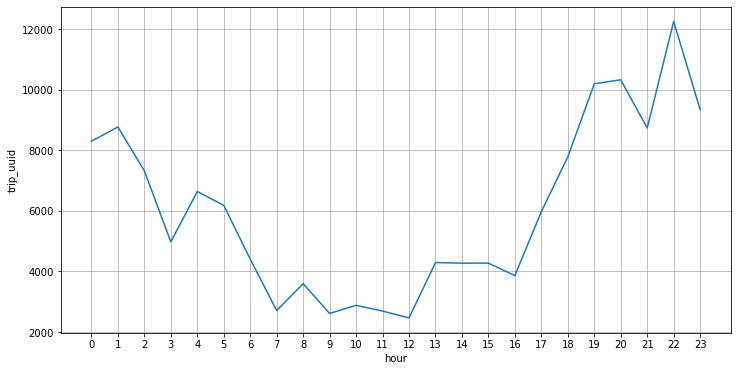

In [44]:
df_hour = df.groupby(by = 'hour')['trip_uuid'].count().to_frame().reset_index()

plt.figure(figsize = (12, 6))
sns.lineplot(data = df_hour, 
             x = df_hour['hour'], 
             y = df_hour['trip_uuid'], 
             markers = '*')
plt.xticks(np.arange(0,24))
plt.grid('both')
plt.plot()

 - It can be inferred from the above plot that the number of trips start increasing after the noon, becomes maximum at 10 P.M and then start decreasing.

[]

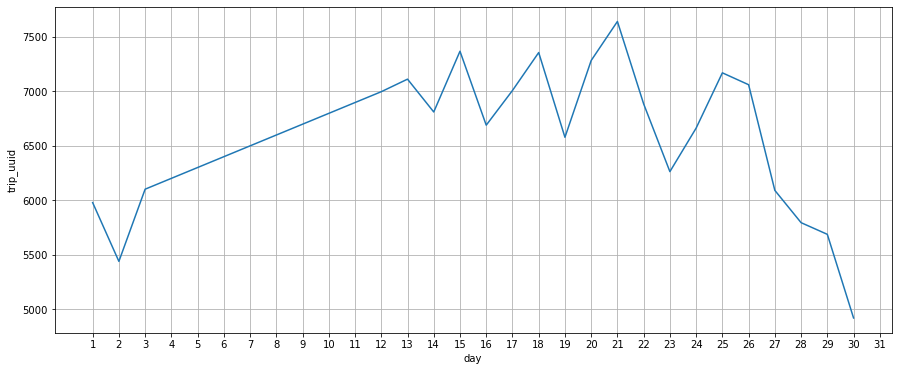

In [45]:
df_day = df.groupby(by = 'day')['trip_uuid'].count().to_frame().reset_index()

plt.figure(figsize = (15, 6))
sns.lineplot(data = df_day, 
             x = df_day['day'], 
             y = df_day['trip_uuid'], 
             markers = 'o')
plt.xticks(np.arange(1, 32))
plt.grid('both')
plt.plot()

 - It can be inferred from the above plot that most of the trips are created in the mid of the month.
 - That means customers usually make more orders in the mid of the month.

## Contribution of route type & data

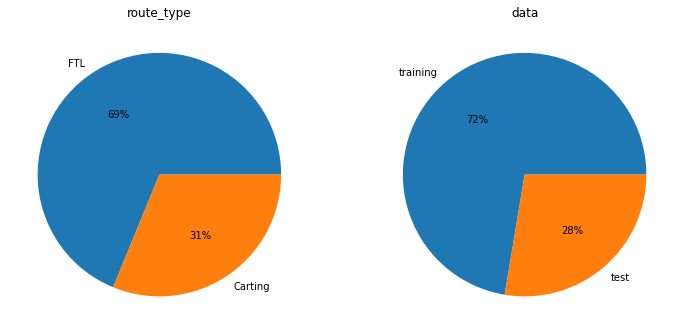

In [46]:
# % of Full truck loading and carting in the whole dataset
x = df['route_type'].value_counts()
y = df['route_type'].value_counts().index

# % of training and testing data in the whole dataset
x1 = df['data'].value_counts()
y1 = df['data'].value_counts().index

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.pie(x,labels=y, autopct='%.0f%%')
plt.title('route_type')


plt.subplot(1,2,2)
plt.pie(x1,labels=y1, autopct='%.0f%%')
plt.title('data')
plt.show()


## Segment wise trip counts (Top 50 Corridor)

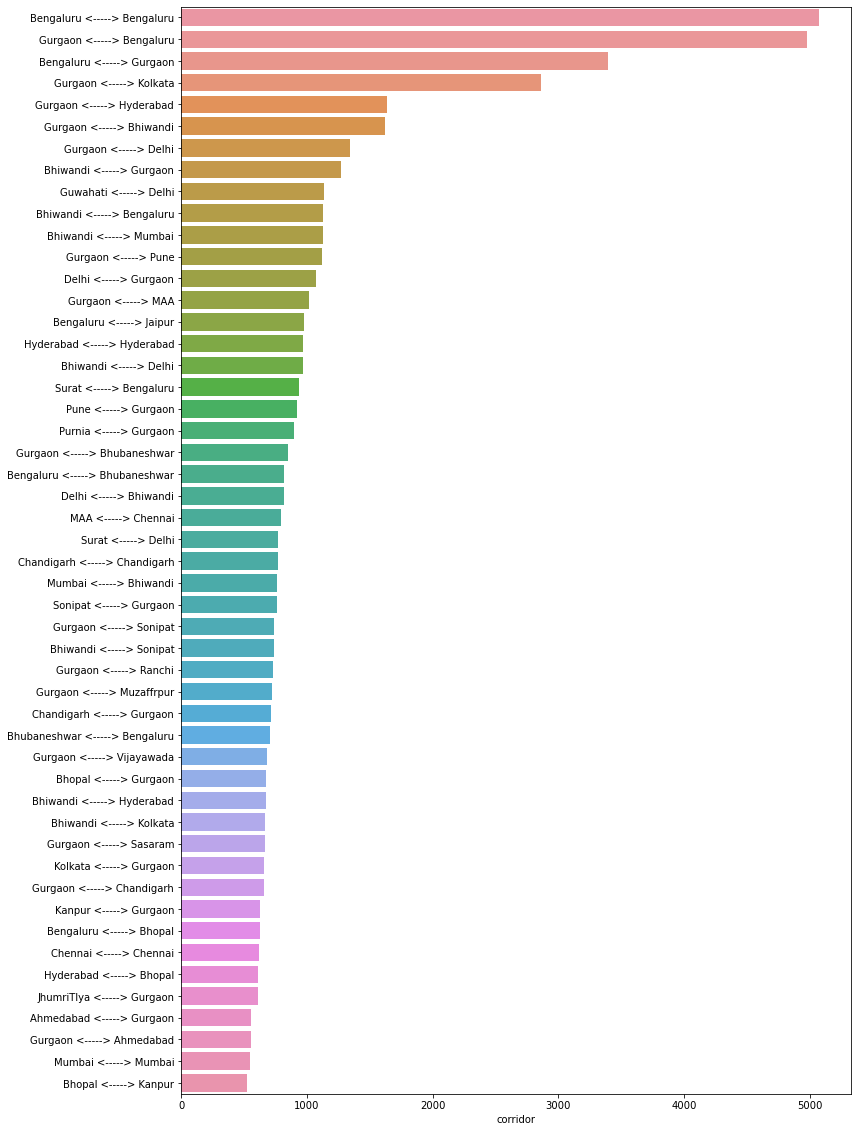

In [47]:
# top 50 corridor in term of number of trip made
x2=df['corridor'].value_counts().sort_values(ascending=False).nlargest(50)
y2=x2.index

plt.figure(figsize=(12,20))
sns.barplot(y=y2, x=x2, data=df)
plt.show()

# Trip made between this given duration

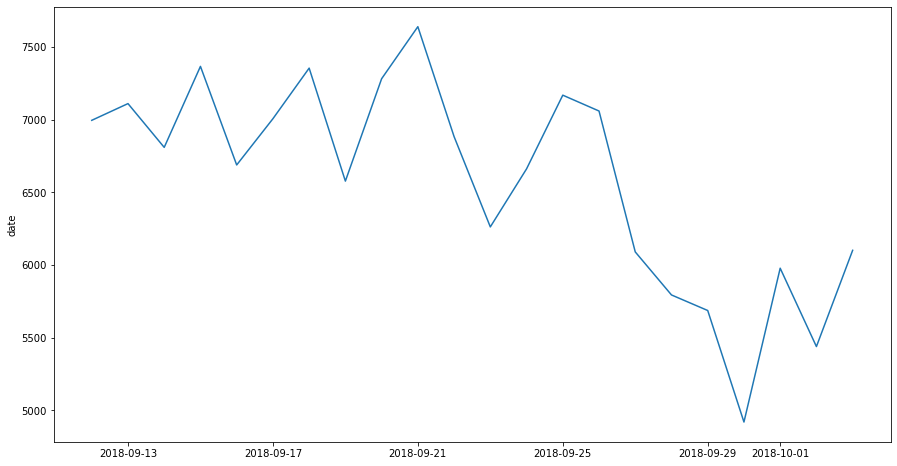

In [48]:
x3 = df['date'].value_counts().sort_values()
y3=x3.index

plt.figure(figsize=(15,8))
sns.lineplot( x=y3, y=x3)
plt.show()

# Merging the rows
Since delivery details of one package is divided into several rows (think of it as
connecting flights to reach a particular destination).
Now think about…
●How should we treat their fields if we combine these rows?
● What aggregation would make sense if we merge?
● What would happen to the numeric fields if we merge the rows?
## 1. Grouping by segment
 * Create a unique identifier for different segments of a trip based on the
combination of the trip_uuid, source_center, and destination_center and
name it as segment_key.
 * You can use inbuilt functions like groupby and aggregations like
cumsum() to merge the rows in columns segment_actual_time,
segment_osrm_distance, segment_osrm_time based on the
segment_key.
 * This way you’ll get new columns named segment_actual_time_sum,
segment_osrm_distance_sum, segment_osrm_time_sum.

## 2. Aggregating at segment level
* Create a dictionary named create_segment_dict, that defines how to
aggregate and select values.
i. You can keep the first and last values for some
numeric/categorical fields if aggregating them won’t make sense.
* Further group the data by segment_key because you want to perform
aggregation operations for different segments of each trip based on the
segment_key value.
* The aggregation functions specified in the create_segment_dict are
applied to each group of rows with the same segment_key.
* Sort the resulting DataFrame segment, by two criteria:
i.First, it sorts by segment_key to ensure that segments are
ordered consistently.
ii. Second, it sorts by od_end_time in ascending order, ensuring that
segments within the same trip are ordered by their end times
from earliest to latest.

In [49]:
segment_key = ['trip_uuid','source_center','destination_center']
segment_col = ['segment_actual_time','segment_osrm_time','segment_osrm_distance']

df['segment_key'] = df['trip_uuid']+'_'+df['source_center']+'_'+df['destination_center']

for col in segment_col:
    df[col+'_sum'] = df.groupby('segment_key')[col].cumsum()
df[['segment_key','segment_actual_time_sum','segment_osrm_time_sum','segment_osrm_distance_sum']]

,segment_key,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.0,11.965300
1,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,20.0,21.724300
2,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,27.0,32.539497
3,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,39.0,45.561897
4,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,44.0,49.477200
...,...,...,...,...
144862,trip-153746066843555182_IND131028AAB_IND000000ACB,92.0,94.0,65.348701
144863,trip-153746066843555182_IND131028AAB_IND000000ACB,118.0,115.0,82.721199
144864,trip-153746066843555182_IND131028AAB_IND000000ACB,138.0,149.0,103.426498
144865,trip-153746066843555182_IND131028AAB_IND000000ACB,155.0,176.0,122.314995


In [50]:
segment_dict = {
    'trip_uuid' : 'first',
    'data': 'first',
    'route_type': 'first',
    'trip_creation_time': 'first',
    'source_name': 'first',
    'destination_name': 'last',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'first',
    'actual_distance_to_destination': 'last',
    'actual_time': 'last',
    'osrm_time': 'last',
    'osrm_distance': 'last',
    'segment_actual_time' : 'sum',
    'segment_osrm_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_actual_time_sum': 'last',
    'segment_osrm_time_sum': 'last',
    'segment_osrm_distance_sum': 'last'
}

seg_agg_data = df.groupby('segment_key').agg(segment_dict).reset_index()
seg_agg_data = seg_agg_data.sort_values(by=['segment_key','od_end_time'])
seg_agg_data.head()

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759155,732.0,329.0,446.549591,728.0,534.0,670.620483,728.0,534.0,670.620483
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973694,830.0,388.0,544.802673,820.0,474.0,649.852783,820.0,474.0,649.852783
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644020,47.0,26.0,28.199400,46.0,26.0,28.199501,46.0,26.0,28.199501
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542889,96.0,42.0,56.911598,95.0,39.0,55.989899,95.0,39.0,55.989899
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439606,611.0,212.0,281.210907,608.0,231.0,317.740784,608.0,231.0,317.740784


## Feature Engineering:
Extract features from the below fields:
* Calculate time taken between od_start_time and od_end_time and keep it as a
feature named od_time_diff_hour. Drop the original columns, if required.
* Destination Name: Split and extract features out of destination. City-place-code
(State)
* Source Name: Split and extract features out of destination. City-place-code
(State)
* Trip_creation_time: Extract features like month, year, day, etc.

In [51]:
seg_agg_data['od_time_diff'] = np.round((seg_agg_data['od_end_time'] - seg_agg_data['od_start_time']).dt.total_seconds()/3600,2)

In [52]:
seg_agg_data.drop(columns = ['od_end_time','od_start_time'], inplace=True)

In [53]:
# using regex pattern to seperate the city,place,state 
def extract_info(name):
    pattern = r'^(?P<city>[^\s_]+)_?(?P<place>[^\(\)]*)\s?\((?P<state>[A-Za-z\s&]+)\)$'
    match = re.match(pattern, name)
    if match:
        city = match.group('city').strip()
        place = match.group('place').strip() if match.group('place') else city
        state = match.group('state').strip()
        return city, place, state
    else:
        return None, None, None

In [54]:
seg_agg_data[['source_city', 'source_place', 'source_state']] = seg_agg_data['source_name'].apply(lambda x: pd.Series(extract_info(x)))

In [55]:
seg_agg_data[['destination_city', 'destination_place', 'destination_state']] = seg_agg_data['destination_name'].apply(lambda x: pd.Series(extract_info(x)))

In [56]:
seg_agg_data.head()

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff,source_city,source_place,source_state,destination_city,destination_place,destination_state
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),1260.0,383.759155,732.0,...,728.0,534.0,670.620483,21.01,Kanpur,Central_H_6,Uttar Pradesh,Gurgaon,Bilaspur_HB,Haryana
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,440.973694,830.0,...,820.0,474.0,649.852783,16.66,Bhopal,Trnsport_H,Madhya Pradesh,Kanpur,Central_H_6,Uttar Pradesh
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),58.0,24.644020,47.0,...,46.0,26.0,28.199501,0.98,Doddablpur,ChikaDPP_D,Karnataka,Chikblapur,ShntiSgr_D,Karnataka
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),122.0,48.542889,96.0,...,95.0,39.0,55.989899,2.05,Tumkur,Veersagr_I,Karnataka,Doddablpur,ChikaDPP_D,Karnataka
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),834.0,237.439606,611.0,...,608.0,231.0,317.740784,13.91,Gurgaon,Bilaspur_HB,Haryana,Chandigarh,Mehmdpur_H,Punjab


In [57]:
seg_agg_data['trip_creation_Year'] = seg_agg_data['trip_creation_time'].dt.year
seg_agg_data['trip_creation_Month'] = seg_agg_data['trip_creation_time'].dt.month
seg_agg_data['trip_creation_Day'] = seg_agg_data['trip_creation_time'].dt.day


In [58]:
seg_agg_data

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,od_time_diff,source_city,source_place,source_state,destination_city,destination_place,destination_state,trip_creation_Year,trip_creation_Month,trip_creation_Day
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),1260.0,383.759155,732.0,...,21.01,Kanpur,Central_H_6,Uttar Pradesh,Gurgaon,Bilaspur_HB,Haryana,2018,9,12
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,440.973694,830.0,...,16.66,Bhopal,Trnsport_H,Madhya Pradesh,Kanpur,Central_H_6,Uttar Pradesh,2018,9,12
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),58.0,24.644020,47.0,...,0.98,Doddablpur,ChikaDPP_D,Karnataka,Chikblapur,ShntiSgr_D,Karnataka,2018,9,12
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),122.0,48.542889,96.0,...,2.05,Tumkur,Veersagr_I,Karnataka,Doddablpur,ChikaDPP_D,Karnataka,2018,9,12
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),834.0,237.439606,611.0,...,13.91,Gurgaon,Bilaspur_HB,Haryana,Chandigarh,Mehmdpur_H,Punjab,2018,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069_IND628204AAA_IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),62.0,33.627182,51.0,...,1.04,Tirchchndr,Shnmgprm_D,Tamil Nadu,Thisayanvilai,UdnkdiRD_D,Tamil Nadu,2018,10,3
26364,trip-153861115439069069_IND628613AAA_IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),91.0,33.673836,90.0,...,1.52,Peikulam,SriVnktpm_D,Tamil Nadu,Tirunelveli,VdkkuSrt_I,Tamil Nadu,2018,10,3
26365,trip-153861115439069069_IND628801AAA_IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),44.0,12.661944,30.0,...,0.74,Eral,Busstand_D,Tamil Nadu,Tirchchndr,Shnmgprm_D,Tamil Nadu,2018,10,3
26366,trip-153861118270144424_IND583119AAA_IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),287.0,40.546738,233.0,...,4.79,Sandur,WrdN1DPP_D,Karnataka,Bellary,Dc,Karnataka,2018,10,3


In [59]:
seg_agg_data['segment_key'].count()

26368

In [60]:
print(seg_agg_data['source_city'].count())
print(seg_agg_data['source_state'].count())
print(seg_agg_data['source_place'].count())
print(seg_agg_data['destination_city'].count())
print(seg_agg_data['destination_state'].count())
print(seg_agg_data['destination_place'].count())

26302
26302
26302
26287
26287
26287


In [61]:
dt = seg_agg_data

In [62]:
seg_agg_data['source_city'].fillna('unkown', inplace=True)
seg_agg_data['source_place'].fillna('unkown', inplace=True)
seg_agg_data['source_state'].fillna('unkown', inplace=True)
seg_agg_data['destination_city'].fillna('unkown', inplace=True)
seg_agg_data['destination_place'].fillna('unkown', inplace=True)
seg_agg_data['destination_state'].fillna('unkown', inplace=True)

In [63]:
seg_agg_data.loc[seg_agg_data['source_place']=='','source_place'] = seg_agg_data.loc[seg_agg_data['source_place']=='','source_city']

In [64]:
seg_agg_data.loc[seg_agg_data['destination_place']=='','destination_place'] = seg_agg_data.loc[seg_agg_data['destination_place']=='','destination_city']

In [65]:
seg_agg_data.isna().sum()

segment_key                       0
trip_uuid                         0
data                              0
route_type                        0
trip_creation_time                0
source_name                       0
destination_name                  0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_actual_time_sum           0
segment_osrm_time_sum             0
segment_osrm_distance_sum         0
od_time_diff                      0
source_city                       0
source_place                      0
source_state                      0
destination_city                  0
destination_place                 0
destination_state                 0
trip_creation_Year                0
trip_creation_Month               0
trip_creation_Day           

In [66]:
seg_agg_data.loc[seg_agg_data['source_city']=='Bangalore','source_city']='Bengaluru'
seg_agg_data.loc[seg_agg_data['destination_city']=='Bangalore','destination_city']='Bengaluru'

In [67]:
seg_agg_data.head()

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,od_time_diff,source_city,source_place,source_state,destination_city,destination_place,destination_state,trip_creation_Year,trip_creation_Month,trip_creation_Day
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),1260.0,383.759155,732.0,...,21.01,Kanpur,Central_H_6,Uttar Pradesh,Gurgaon,Bilaspur_HB,Haryana,2018,9,12
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,440.973694,830.0,...,16.66,Bhopal,Trnsport_H,Madhya Pradesh,Kanpur,Central_H_6,Uttar Pradesh,2018,9,12
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),58.0,24.644020,47.0,...,0.98,Doddablpur,ChikaDPP_D,Karnataka,Chikblapur,ShntiSgr_D,Karnataka,2018,9,12
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),122.0,48.542889,96.0,...,2.05,Tumkur,Veersagr_I,Karnataka,Doddablpur,ChikaDPP_D,Karnataka,2018,9,12
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),834.0,237.439606,611.0,...,13.91,Gurgaon,Bilaspur_HB,Haryana,Chandigarh,Mehmdpur_H,Punjab,2018,9,12


In [68]:
seg_agg_data.head()

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,od_time_diff,source_city,source_place,source_state,destination_city,destination_place,destination_state,trip_creation_Year,trip_creation_Month,trip_creation_Day
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),1260.0,383.759155,732.0,...,21.01,Kanpur,Central_H_6,Uttar Pradesh,Gurgaon,Bilaspur_HB,Haryana,2018,9,12
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,440.973694,830.0,...,16.66,Bhopal,Trnsport_H,Madhya Pradesh,Kanpur,Central_H_6,Uttar Pradesh,2018,9,12
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),58.0,24.644020,47.0,...,0.98,Doddablpur,ChikaDPP_D,Karnataka,Chikblapur,ShntiSgr_D,Karnataka,2018,9,12
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),122.0,48.542889,96.0,...,2.05,Tumkur,Veersagr_I,Karnataka,Doddablpur,ChikaDPP_D,Karnataka,2018,9,12
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),834.0,237.439606,611.0,...,13.91,Gurgaon,Bilaspur_HB,Haryana,Chandigarh,Mehmdpur_H,Punjab,2018,9,12


##### I am interested to know what is the distribution of number of trips created from different states  

[]

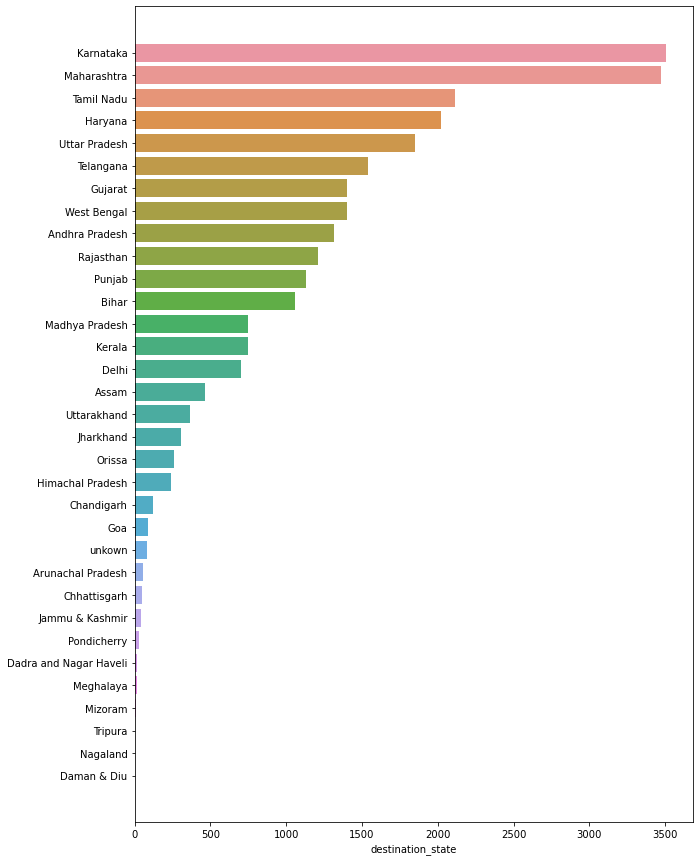

In [69]:
plt.figure(figsize = (10, 15))
sns.barplot(data = seg_agg_data, 
            x = seg_agg_data['destination_state'].value_counts(), 
            y = seg_agg_data['destination_state'].value_counts().index)
plt.plot()

 - It can be seen in the above plot that maximum trips originated from Karnataka state followed by Maharashtra and Tamil Nadu. That means that the seller base is strong in these states

##### I am interested to know what is the distribution of number of trips which ended in different states  

[]

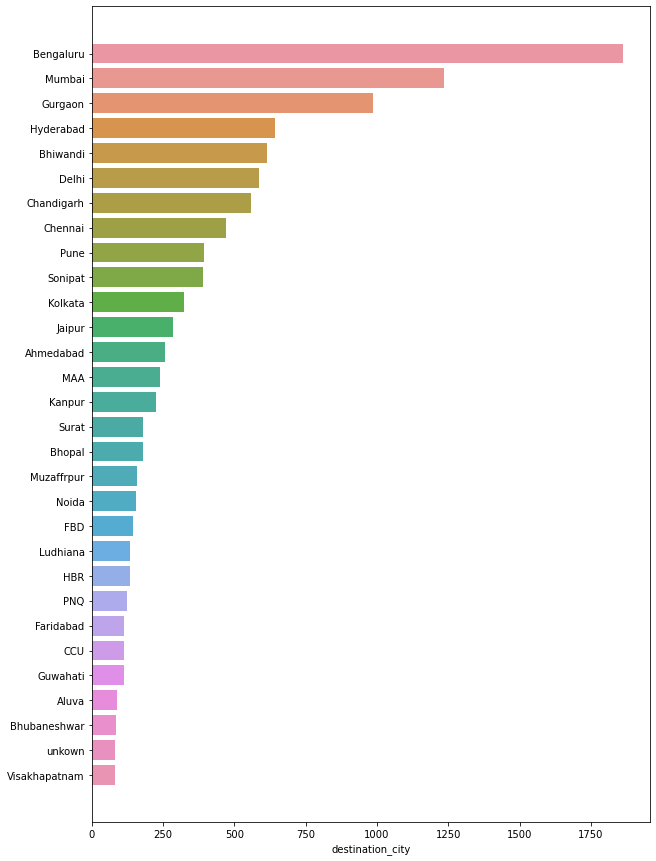

In [70]:
plt.figure(figsize = (10, 15))
sns.barplot(data = seg_agg_data, 
            x = seg_agg_data['destination_city'].value_counts().nlargest(30), 
            y = seg_agg_data['destination_city'].value_counts().nlargest(30).index)
plt.plot()

 - It can be seen in the above plot that maximum trips ended in Bengaluru city followed by Mumbai, Gurgaon, Hydrabad and Bhiwandi. That means that the number of orders placed in these cities is significantly high.

[]

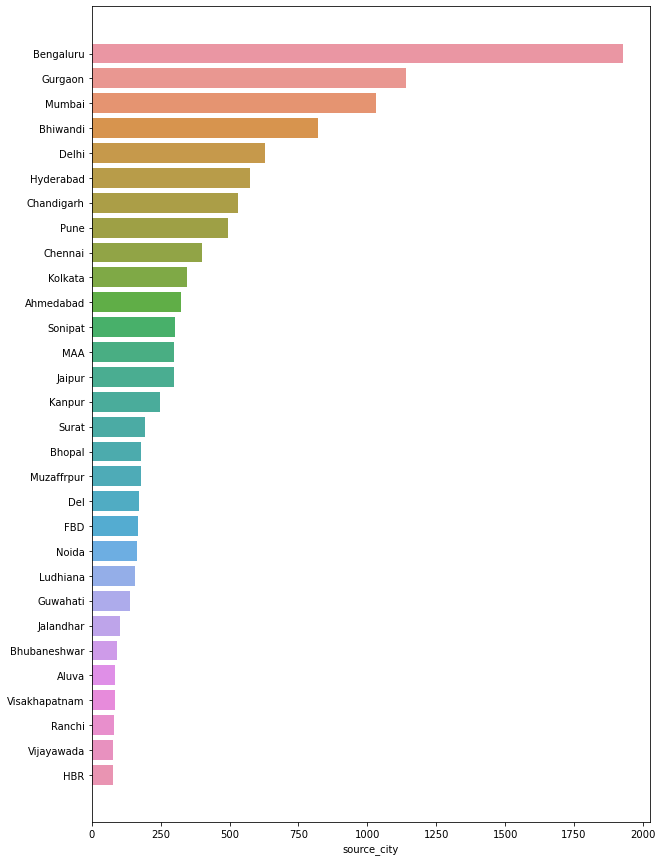

In [71]:
plt.figure(figsize = (10, 15))
sns.barplot(data = seg_agg_data, 
            x = seg_agg_data['source_city'].value_counts().nlargest(30), 
            y = seg_agg_data['source_city'].value_counts().nlargest(30).index)
plt.plot()

[]

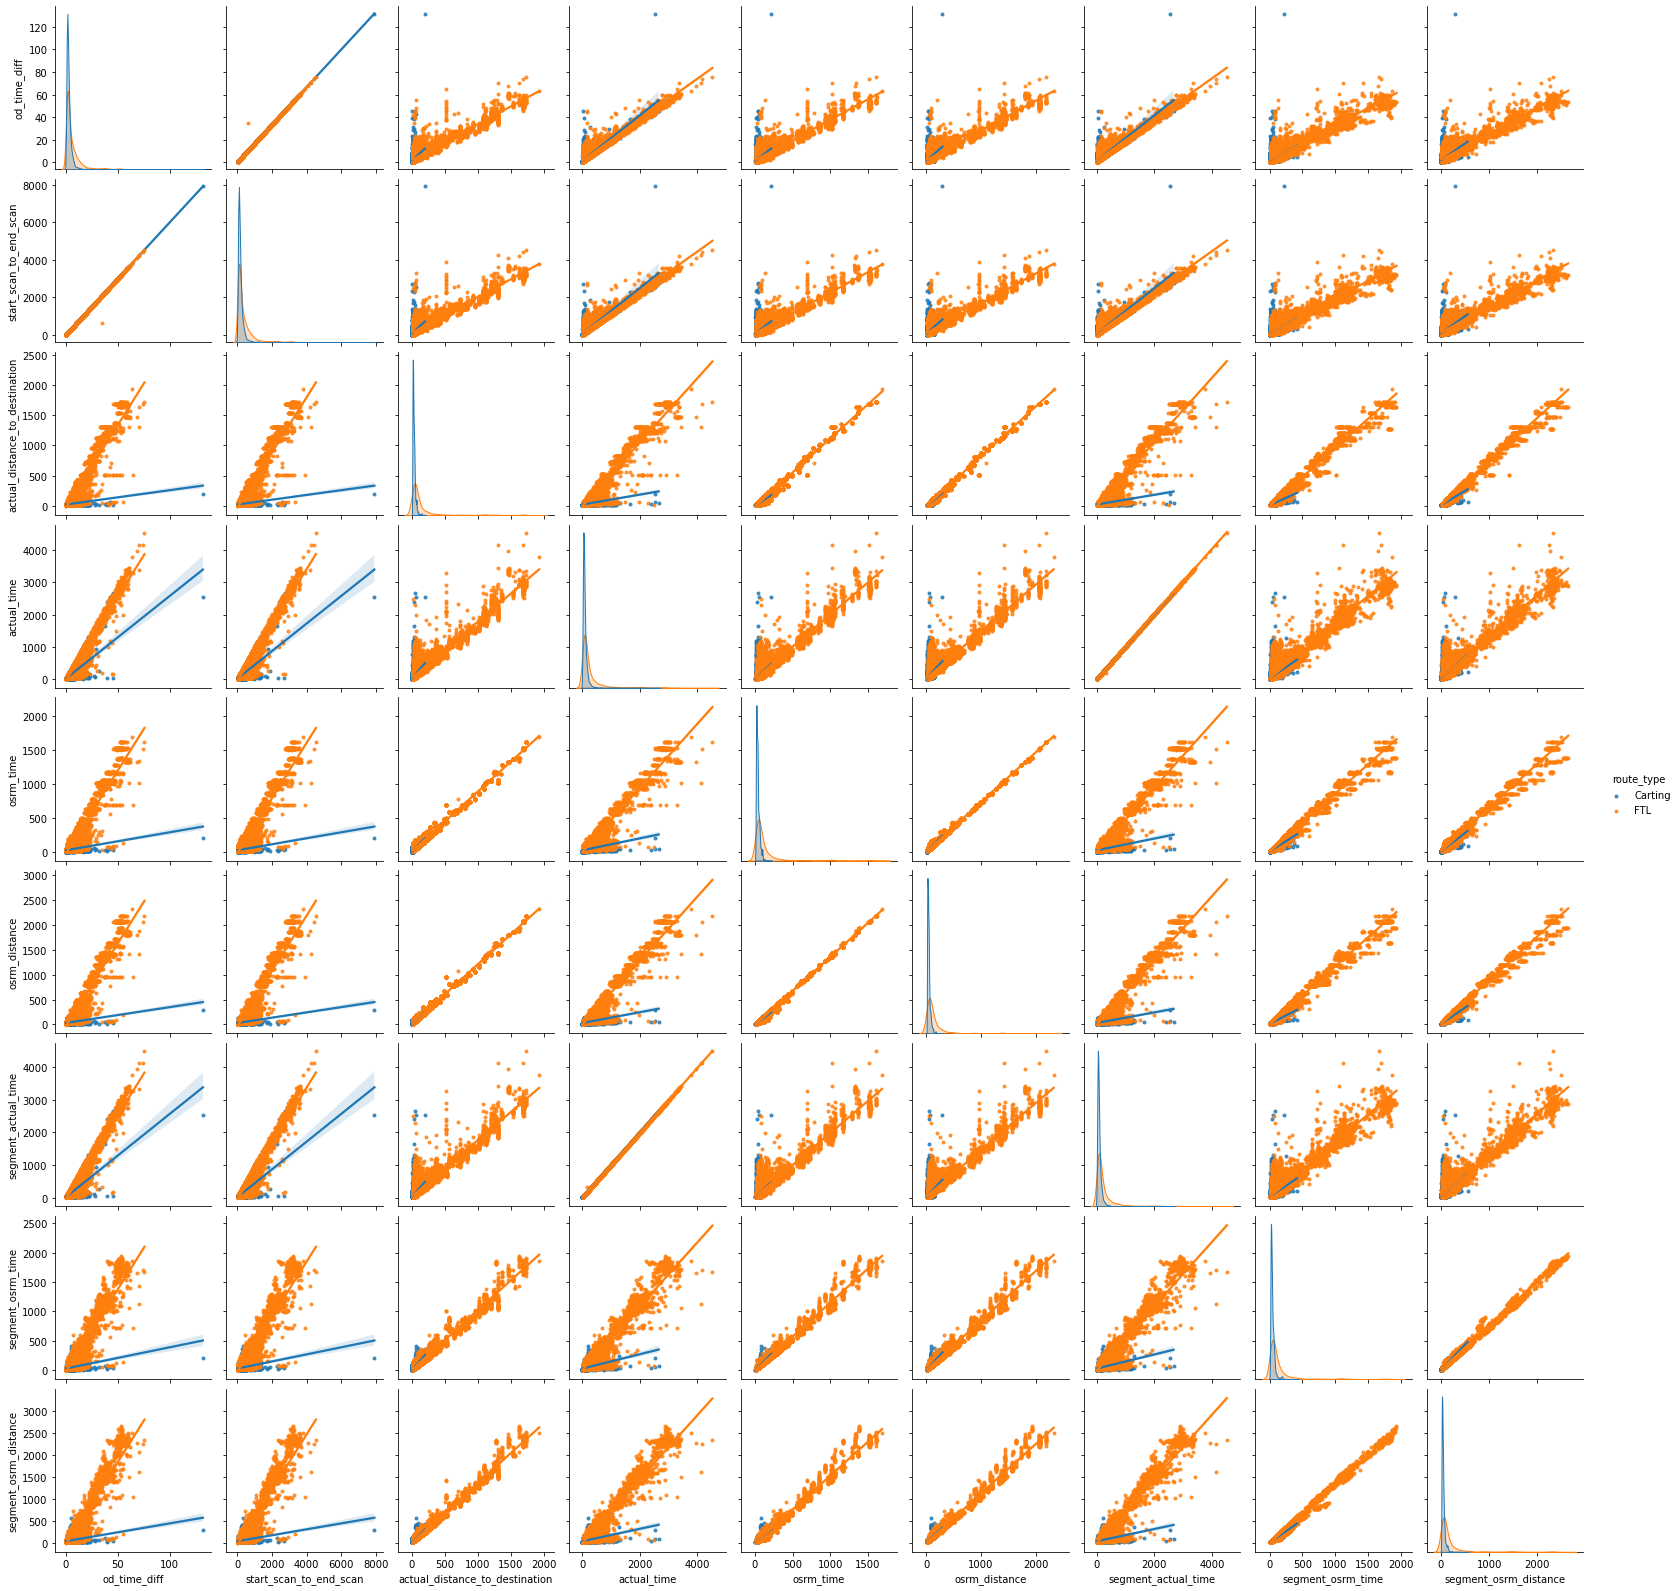

In [72]:
numerical_columns = ['od_time_diff', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
sns.pairplot(data = seg_agg_data,
             vars = numerical_columns,
             kind = 'reg',
             hue = 'route_type',
             markers = '.')
plt.plot()

In [73]:
df_corr = seg_agg_data[numerical_columns].corr()
df_corr

,od_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
od_time_diff,1.000000,0.999796,0.905961,0.954179,0.910881,0.911050,0.954216,0.904097,0.907828
start_scan_to_end_scan,0.999796,1.000000,0.906266,0.954473,0.911197,0.911361,0.954460,0.904397,0.908123
actual_distance_to_destination,0.905961,0.906266,1.000000,0.948995,0.994893,0.997217,0.947989,0.987161,0.992742
actual_time,0.954179,0.954473,0.948995,1.000000,0.953152,0.953845,0.999988,0.947958,0.952183
osrm_time,0.910881,0.911197,0.994893,0.953152,1.000000,0.998384,0.952218,0.992269,0.992677
osrm_distance,0.911050,0.911361,0.997217,0.953845,0.998384,1.000000,0.952905,0.990975,0.994311
segment_actual_time,0.954216,0.954460,0.947989,0.999988,0.952218,0.952905,1.000000,0.947032,0.951255
segment_osrm_time,0.904097,0.904397,0.987161,0.947958,0.992269,0.990975,0.947032,1.000000,0.996500
segment_osrm_distance,0.907828,0.908123,0.992742,0.952183,0.992677,0.994311,0.951255,0.996500,1.000000


[]

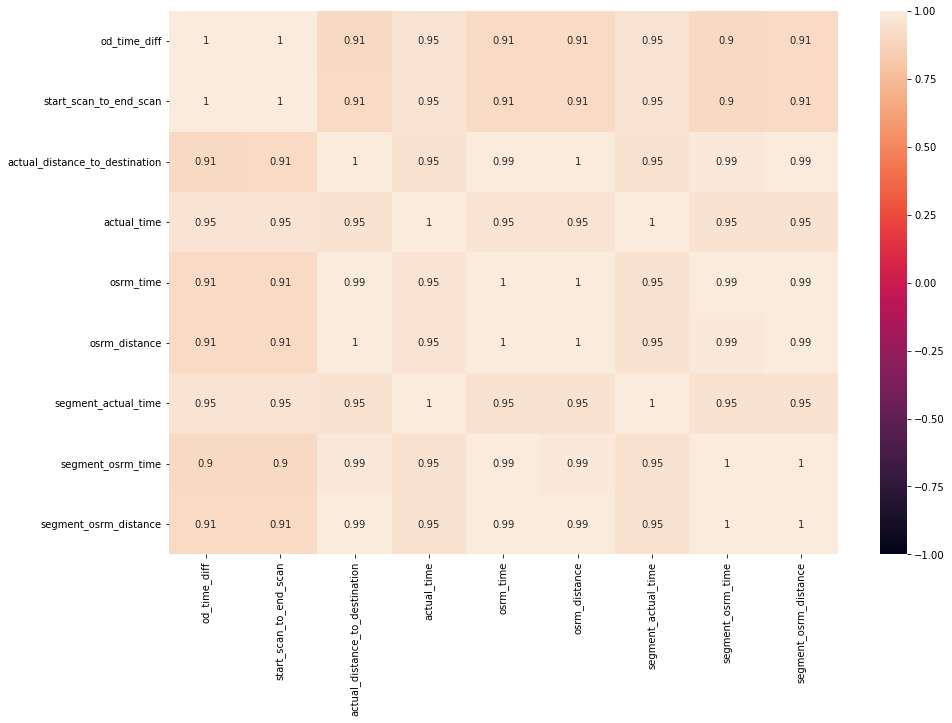

In [74]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_corr, vmin = -1, vmax = 1, annot = True)
plt.plot()

 - Very High Correlation (> 0.9) exists between columns all the numerical columns specified above 

# 4. In-depth analysis:
## Grouping and Aggregating at Trip-level
* Groups the segment data by the trip_uuid column to focus on
aggregating data at the trip level.
* Apply suitable aggregation functions like first, last, and sum specified in
the create_trip_dict dictionary to calculate summary statistics for each
trip.

## Outlier Detection & Treatment
* Find any existing outliers in numerical features.
* Visualize the outlier values using Boxplot.
* Handle the outliers using the IQR method.
* Perform one-hot encoding on categorical features.
* Normalize/ Standardize the numerical features using MinMaxScaler or
StandardScaler.

In [75]:
#creating aggregated data set based on trip id

In [76]:
segment_dict = {
    'data': 'first',
    'route_type': 'first',
    'trip_creation_time': 'first',
    'source_name': 'first',
    'destination_name': 'last',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'first',
    'actual_distance_to_destination': 'last',
    'actual_time': 'last',
    'osrm_time': 'last',
    'osrm_distance': 'last',
    'segment_actual_time' : 'sum',
    'segment_osrm_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_actual_time_sum': 'last',
    'segment_osrm_time_sum': 'last',
    'segment_osrm_distance_sum': 'last'
}

trip_agg_data = df.groupby('trip_uuid').agg(segment_dict).reset_index()
trip_agg_data

,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,999.0,383.759155,732.0,329.0,446.549591,1548.0,1008.0,1320.473267,728.0,534.0,670.620483
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,122.0,24.644020,47.0,26.0,28.199400,141.0,65.0,84.189400,46.0,26.0,28.199501
2,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3099.0,237.439606,611.0,212.0,281.210907,3308.0,1941.0,2545.267822,608.0,231.0,317.740784
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.680000,59.0,16.0,19.876600,59.0,16.0,19.876600
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,152.0,41.317612,131.0,44.0,53.576099,340.0,115.0,146.791901,130.0,44.0,53.576103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,152.0,31.261599,49.0,34.0,44.563900,82.0,62.0,64.855103,49.0,34.0,35.956001
14813,trip-153861104386292051,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.088200,21.0,11.0,16.088299,21.0,11.0,16.088299
14814,trip-153861106442901555,test,Carting,2018-10-03 23:57:44.429324,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,173.0,19.349009,190.0,24.0,30.054501,281.0,88.0,104.886597,190.0,36.0,35.436901
14815,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,105.0,33.673836,90.0,48.0,40.608002,258.0,221.0,223.532410,89.0,77.0,78.586899


In [77]:
trip_agg_data.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,336.474396,111.335724,251.343384,108.337181,138.315323,353.892273,180.949783,223.201324,249.080658,123.823921,152.877289
std,497.933472,247.784592,454.869781,218.236572,299.970581,556.246826,314.541412,416.628296,450.720825,256.444275,339.708832
min,22.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900
25%,108.000000,20.420677,56.000000,24.000000,26.898701,66.000000,31.000000,32.654499,55.000000,25.000000,27.887499
50%,178.000000,35.582874,99.000000,41.000000,44.028999,147.000000,65.000000,70.154404,98.000000,46.000000,49.103600
75%,333.000000,76.454971,213.000000,82.000000,98.603203,367.000000,185.000000,218.802399,212.000000,93.000000,108.954498
max,7898.000000,1927.447754,4532.000000,1686.000000,2326.199219,6230.000000,2564.000000,3523.632324,4504.000000,1938.000000,2640.924805


In [78]:
trip_agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  category      
 2   route_type                      14817 non-null  category      
 3   trip_creation_time              14817 non-null  datetime64[ns]
 4   source_name                     14817 non-null  object        
 5   destination_name                14817 non-null  object        
 6   od_start_time                   14817 non-null  datetime64[ns]
 7   od_end_time                     14817 non-null  datetime64[ns]
 8   start_scan_to_end_scan          14817 non-null  float32       
 9   actual_distance_to_destination  14817 non-null  float32       
 10  actual_time                     14817 non-null  float32       
 11  os

In [79]:
numeric_col = trip_agg_data.select_dtypes(include=['float32'])

<AxesSubplot:>

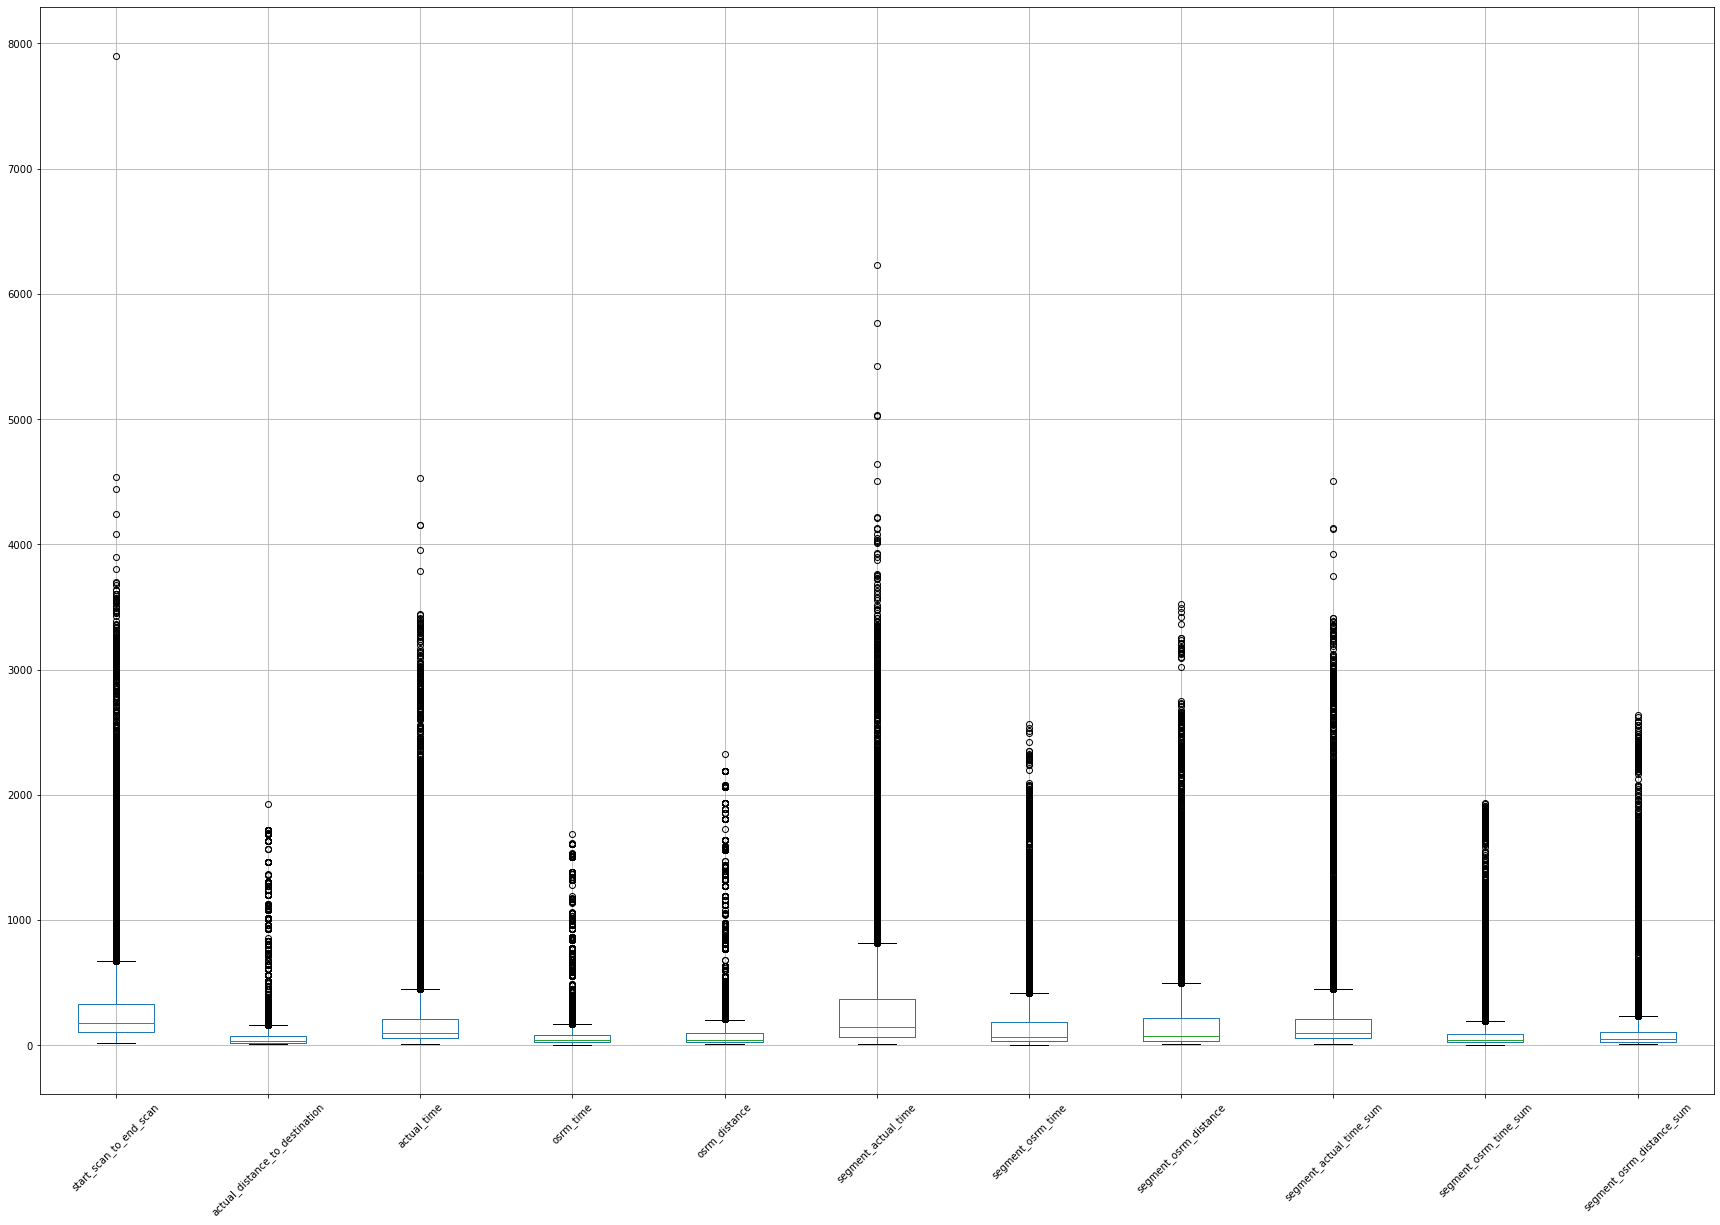

In [80]:
plt.figure(figsize=(30,20))
numeric_col.boxplot(rot=45)

In [81]:
Q1 = numeric_col.quantile(0.25)

In [82]:
Q3 = numeric_col.quantile(0.75)

In [83]:
Q1

start_scan_to_end_scan            108.000000
actual_distance_to_destination     20.420677
actual_time                        56.000000
osrm_time                          24.000000
osrm_distance                      26.898701
segment_actual_time                66.000000
segment_osrm_time                  31.000000
segment_osrm_distance              32.654499
segment_actual_time_sum            55.000000
segment_osrm_time_sum              25.000000
segment_osrm_distance_sum          27.887499
Name: 0.25, dtype: float64

In [84]:
IQR = Q3-Q1

In [85]:
IQR

start_scan_to_end_scan            225.000000
actual_distance_to_destination     56.034294
actual_time                       157.000000
osrm_time                          58.000000
osrm_distance                      71.704502
segment_actual_time               301.000000
segment_osrm_time                 154.000000
segment_osrm_distance             186.147900
segment_actual_time_sum           157.000000
segment_osrm_time_sum              68.000000
segment_osrm_distance_sum          81.066999
dtype: float64

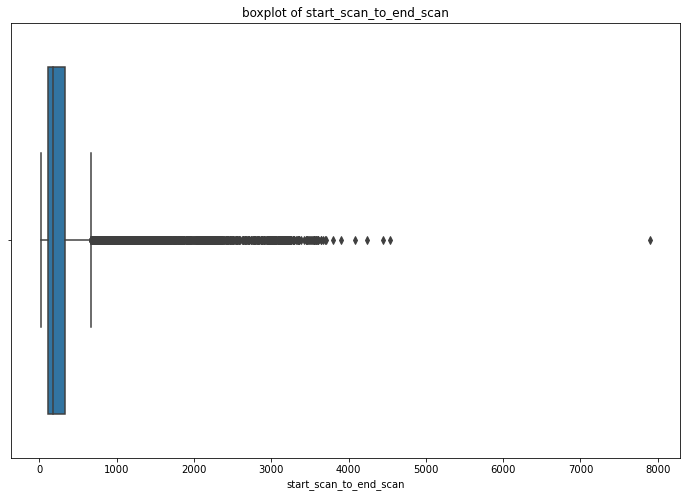

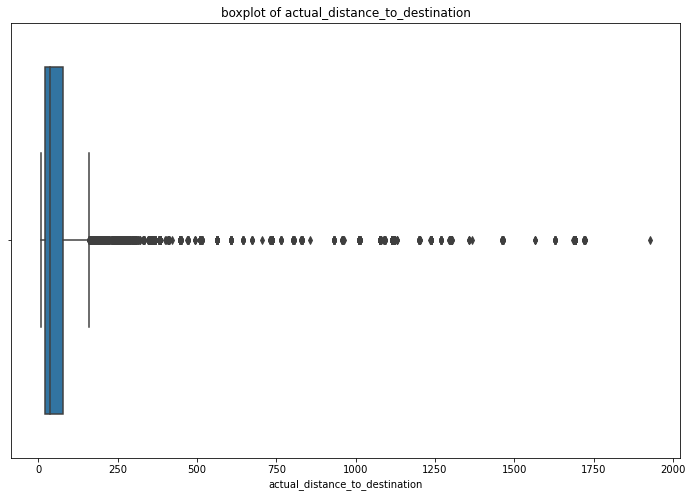

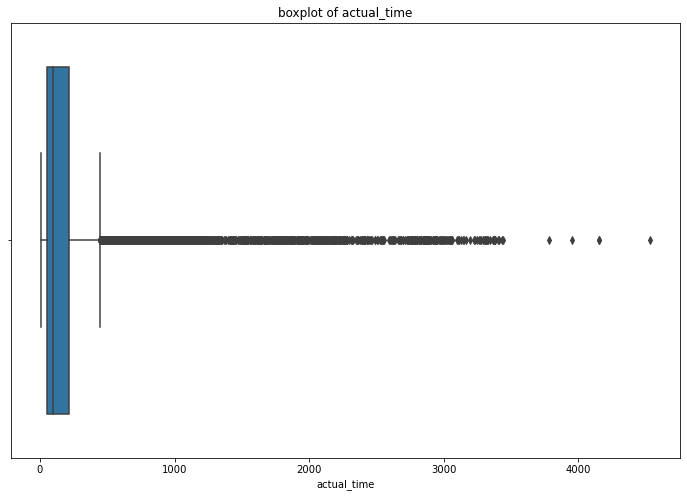

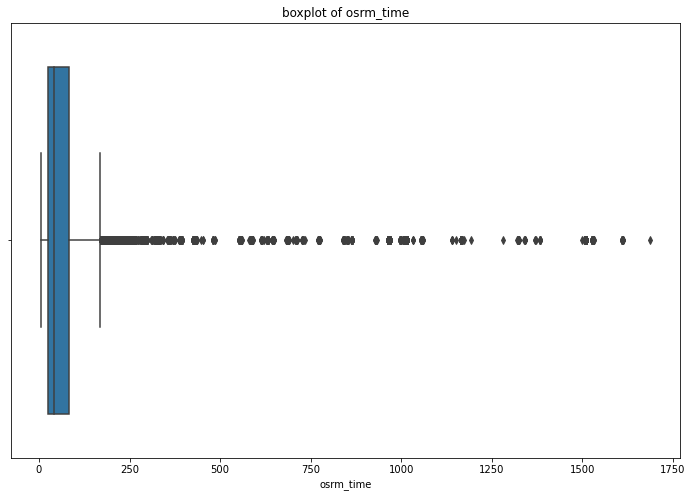

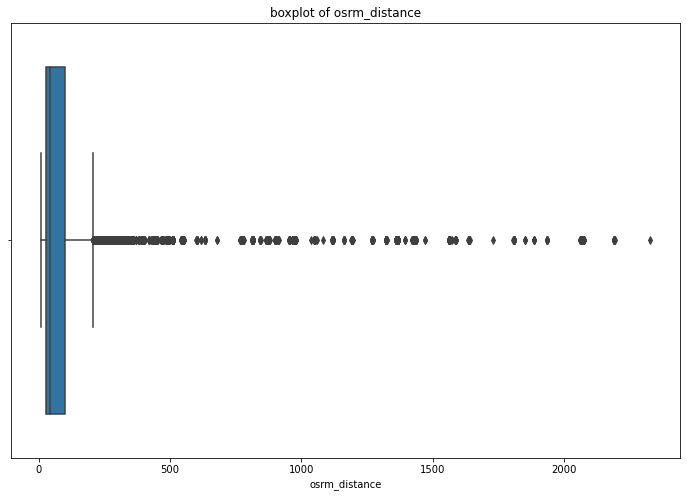

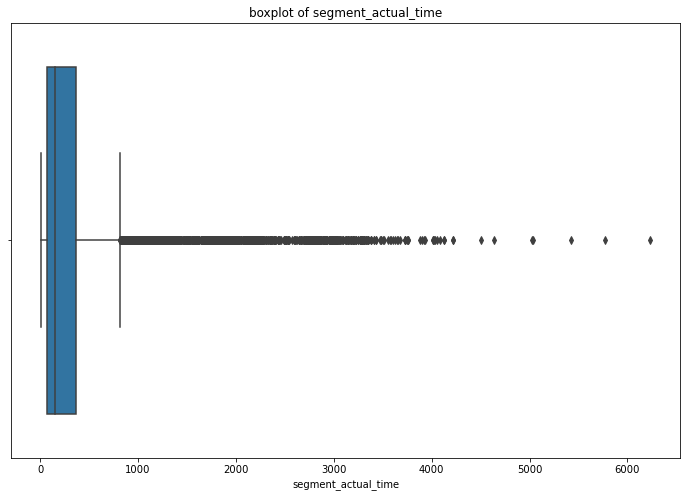

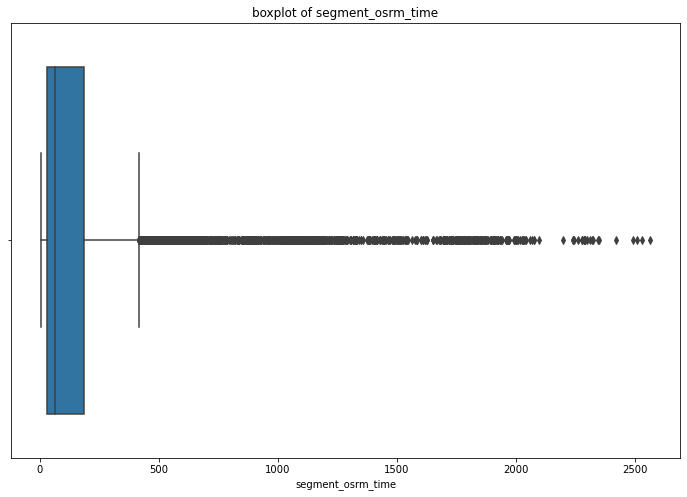

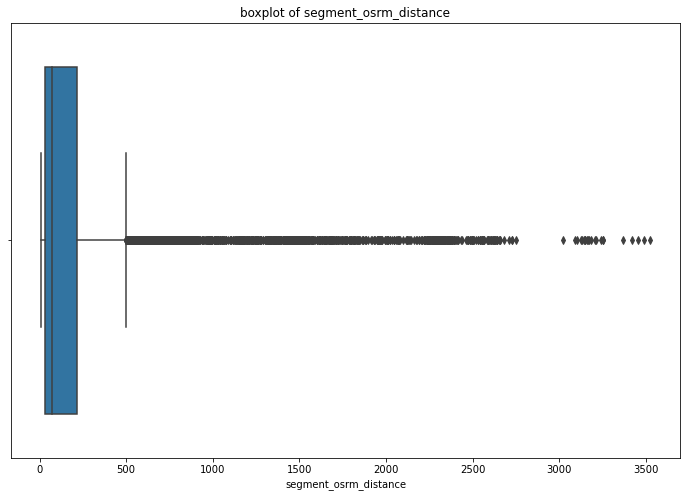

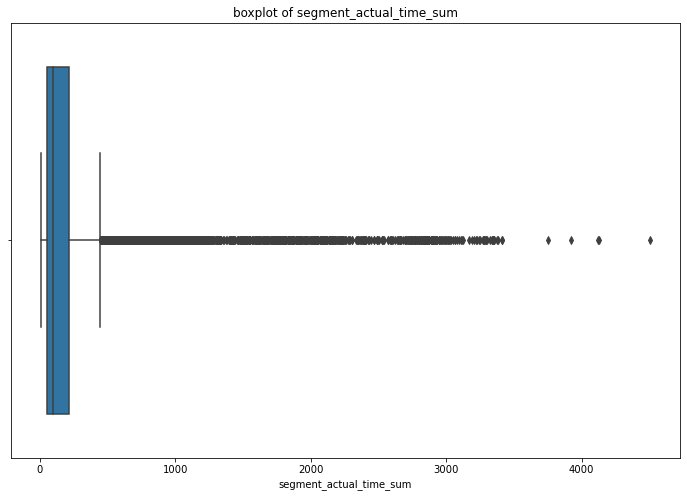

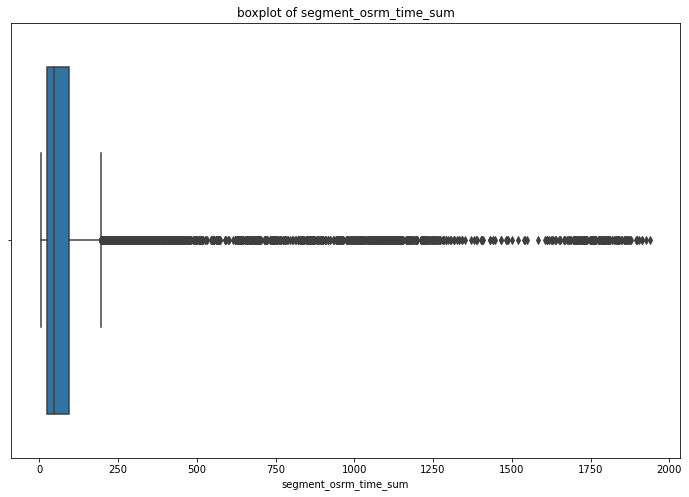

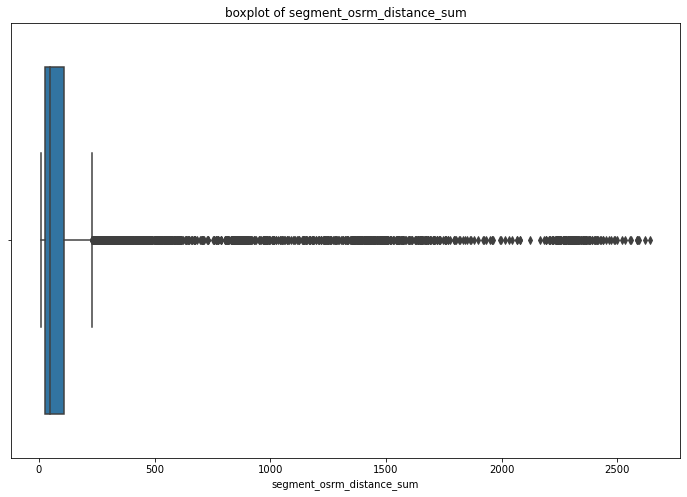

In [86]:
for i, col in enumerate(numeric_col):
    plt.figure(figsize=(12,8))
    sns.boxplot(data=numeric_col, x=col)
    plt.title(f'boxplot of {col}')
    plt.show()

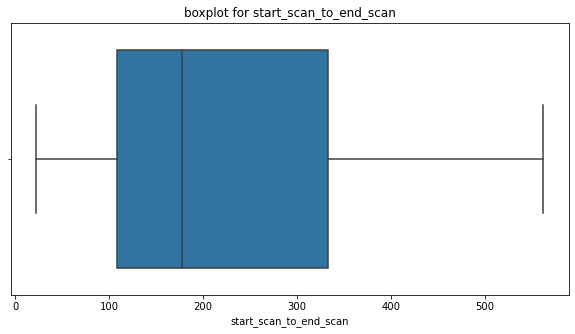

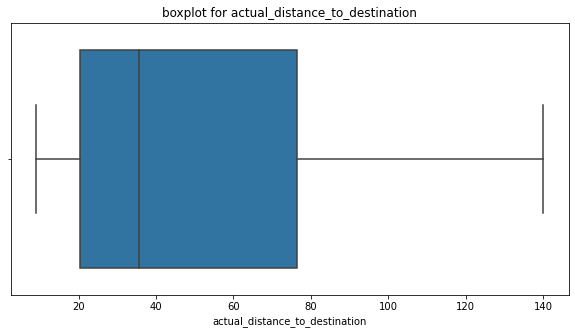

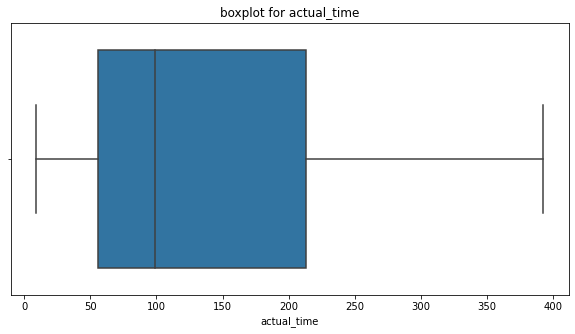

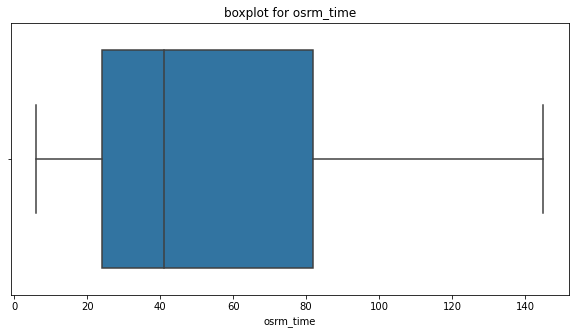

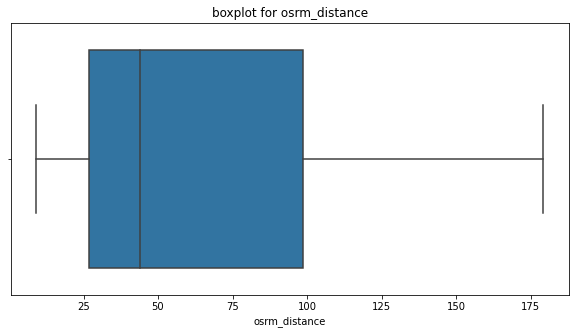

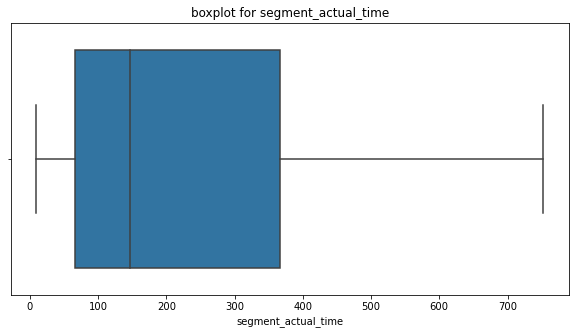

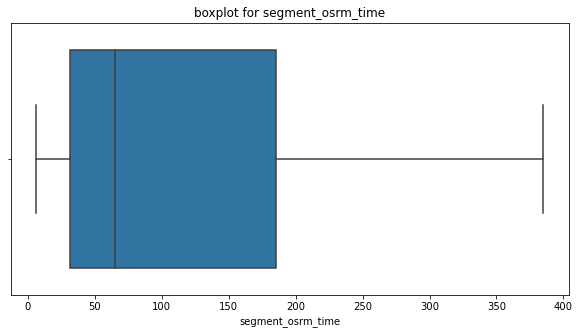

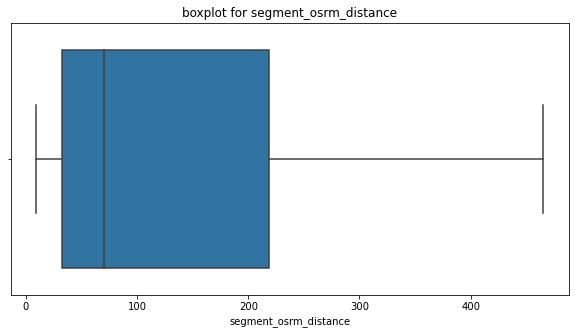

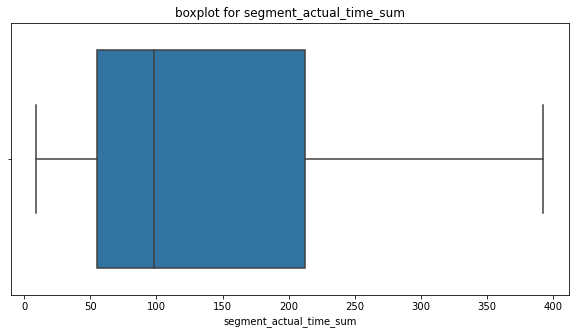

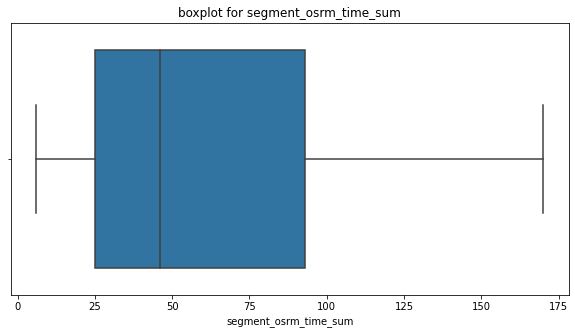

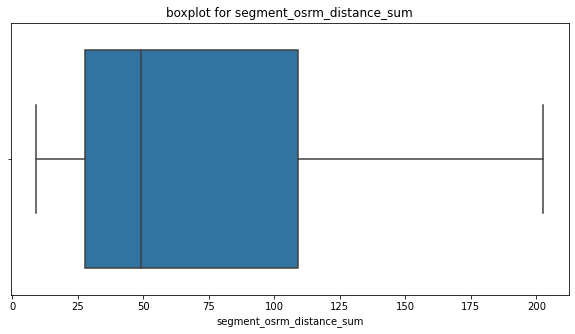

In [87]:
for i, col in enumerate(numeric_col):
    q1 = np.percentile(trip_agg_data[col],25)
    q3 = np.percentile(trip_agg_data[col],75)
    
    iqr = q3 - q1

    lower_bound = iqr - (1.5*iqr)
    upper_bound = iqr + (1.5*iqr)
    
    clipped = np.clip(trip_agg_data[col], lower_bound, upper_bound)
    
    plt.figure(figsize=(10,5))
    sns.boxplot(data=clipped.to_frame(),x=col)
    plt.title(f'boxplot for {col}')
    plt.show()

* The outliers present in our sample data can be the true outliers. It's best to remove outliers only when there is a sound reason for doing so. Some outliers represent natural variations in the population, and they should be left as is in the dataset. 

### Do one-hot encoding of categorical variables (like route_type)

In [88]:
# Get value counts before one-hot encoding

seg_agg_data['route_type'].value_counts()

FTL        13939
Carting    12429
Name: route_type, dtype: int64

In [89]:
# Perform one-hot encoding on categorical column route type
from sklearn.preprocessing import LabelEncoder 
encoded_data = copy.deepcopy(seg_agg_data)
label_encoder = LabelEncoder()
encoded_data['route_type'] = label_encoder.fit_transform(encoded_data['route_type'])

In [90]:
# Get value counts after one-hot encoding

encoded_data['route_type'].value_counts()

1    13939
0    12429
Name: route_type, dtype: int64

In [91]:
# Get value counts of categorical variable 'data' before one-hot encoding

encoded_data['data'].value_counts()

training    18947
test         7421
Name: data, dtype: int64

In [92]:
label_encoder = LabelEncoder()
encoded_data['data'] = label_encoder.fit_transform(encoded_data['data'])

In [93]:
# Get value counts after one-hot encoding

encoded_data['data'].value_counts()

1    18947
0     7421
Name: data, dtype: int64

In [94]:
encoded_data.head()

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,od_time_diff,source_city,source_place,source_state,destination_city,destination_place,destination_state,trip_creation_Year,trip_creation_Month,trip_creation_Day
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,1,1,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),1260.0,383.759155,732.0,...,21.01,Kanpur,Central_H_6,Uttar Pradesh,Gurgaon,Bilaspur_HB,Haryana,2018,9,12
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,1,1,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,440.973694,830.0,...,16.66,Bhopal,Trnsport_H,Madhya Pradesh,Kanpur,Central_H_6,Uttar Pradesh,2018,9,12
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,1,0,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),58.0,24.644020,47.0,...,0.98,Doddablpur,ChikaDPP_D,Karnataka,Chikblapur,ShntiSgr_D,Karnataka,2018,9,12
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,1,0,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),122.0,48.542889,96.0,...,2.05,Tumkur,Veersagr_I,Karnataka,Doddablpur,ChikaDPP_D,Karnataka,2018,9,12
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,1,1,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),834.0,237.439606,611.0,...,13.91,Gurgaon,Bilaspur_HB,Haryana,Chandigarh,Mehmdpur_H,Punjab,2018,9,12


### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
encoded_data.columns

Index(['segment_key', 'trip_uuid', 'data', 'route_type', 'trip_creation_time',
       'source_name', 'destination_name', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum', 'od_time_diff',
       'source_city', 'source_place', 'source_state', 'destination_city',
       'destination_place', 'destination_state', 'trip_creation_Year',
       'trip_creation_Month', 'trip_creation_Day'],
      dtype='object')

[]

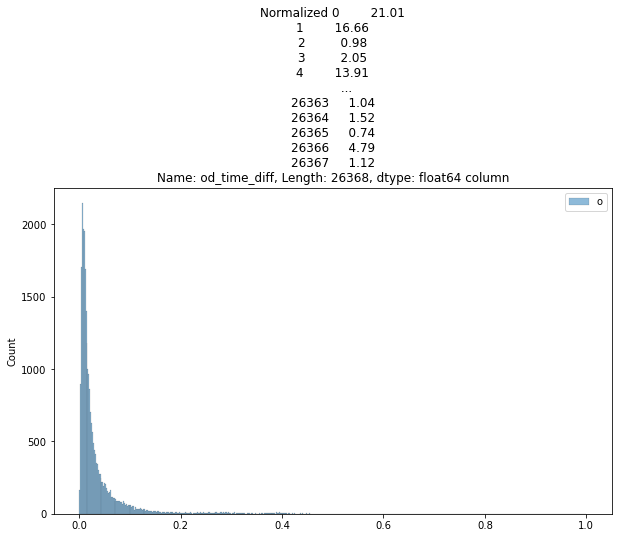

In [97]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(encoded_data['od_time_diff'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {encoded_data['od_time_diff']} column")
plt.legend('od_time_diff')
plt.plot()

[]

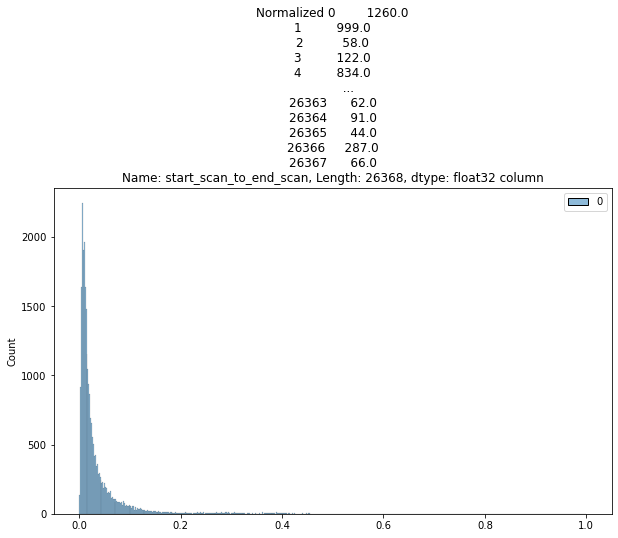

In [98]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(encoded_data['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {encoded_data['start_scan_to_end_scan']} column")
plt.plot()

[]

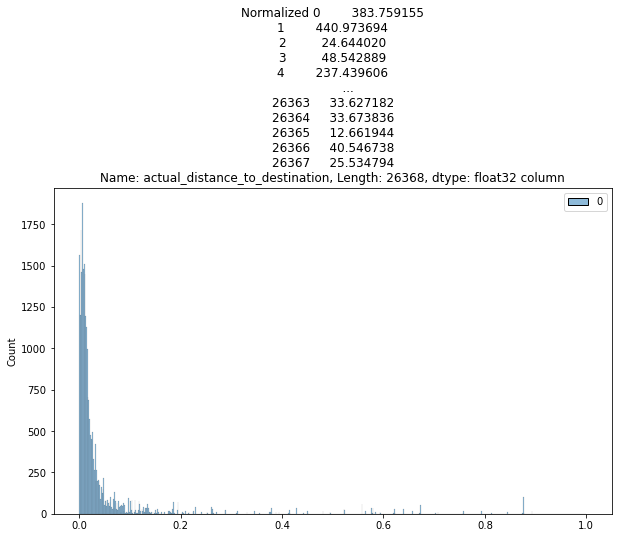

In [99]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(encoded_data['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {encoded_data['actual_distance_to_destination']} column")
plt.plot()

[]

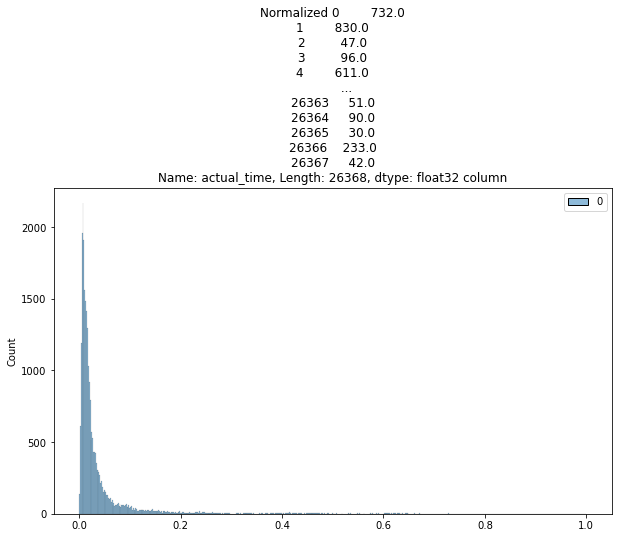

In [100]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(encoded_data['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {encoded_data['actual_time']} column")
plt.plot()

[]

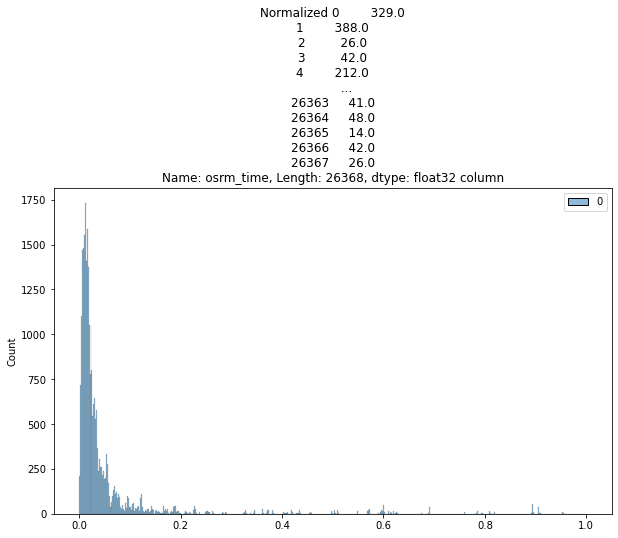

In [101]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(encoded_data['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {encoded_data['osrm_time']} column")
plt.plot()

[]

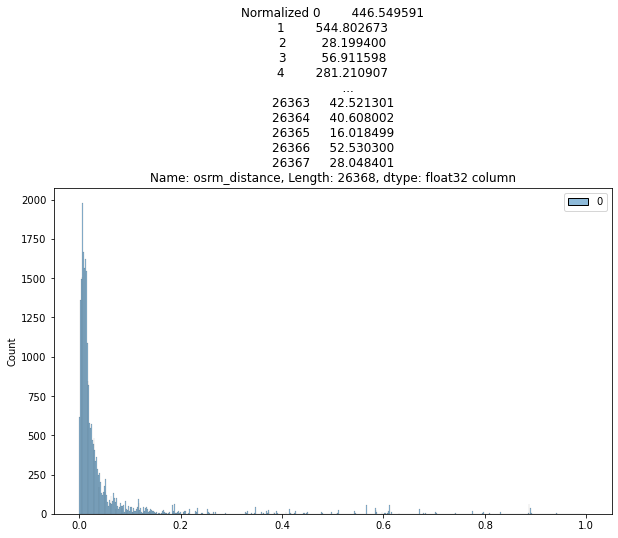

In [102]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(encoded_data['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {encoded_data['osrm_distance']} column")
plt.plot()

[]

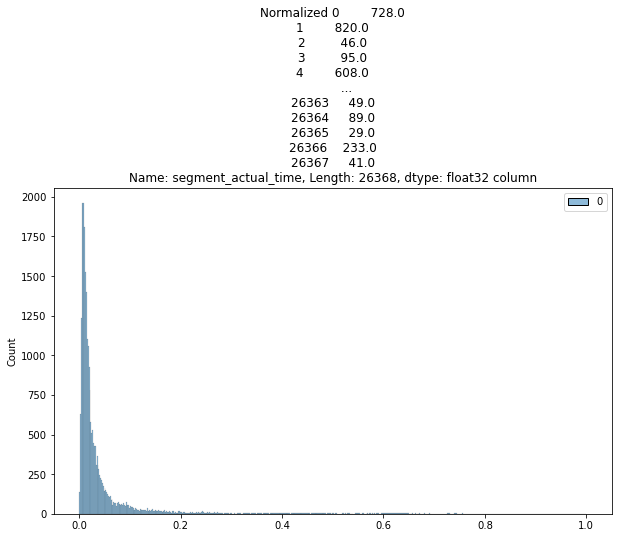

In [103]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(encoded_data['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {encoded_data['segment_actual_time']} column")
plt.plot()

[]

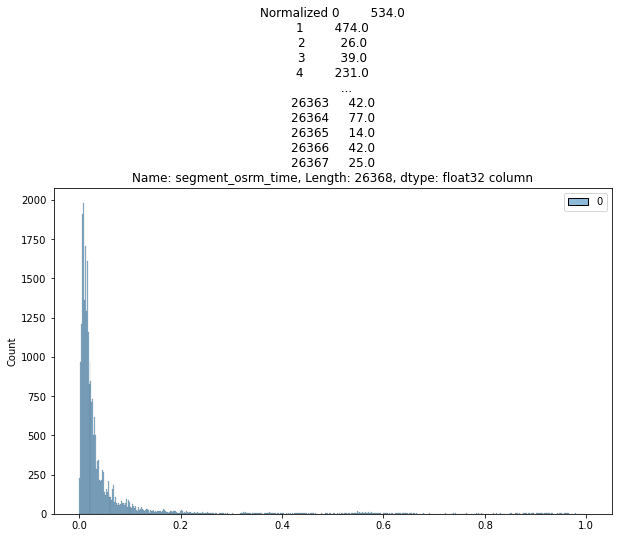

In [104]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(encoded_data['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {encoded_data['segment_osrm_time']} column")
plt.plot()

[]

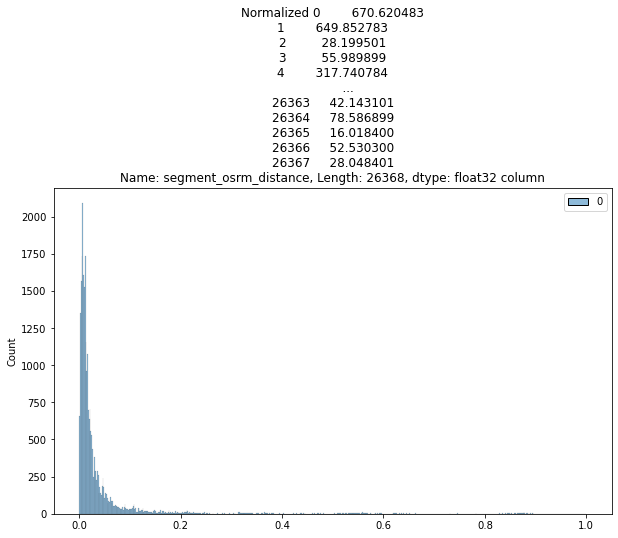

In [105]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(encoded_data['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {encoded_data['segment_osrm_distance']} column")
plt.plot()

#### Column Standardization

In [106]:
from sklearn.preprocessing import StandardScaler

[]

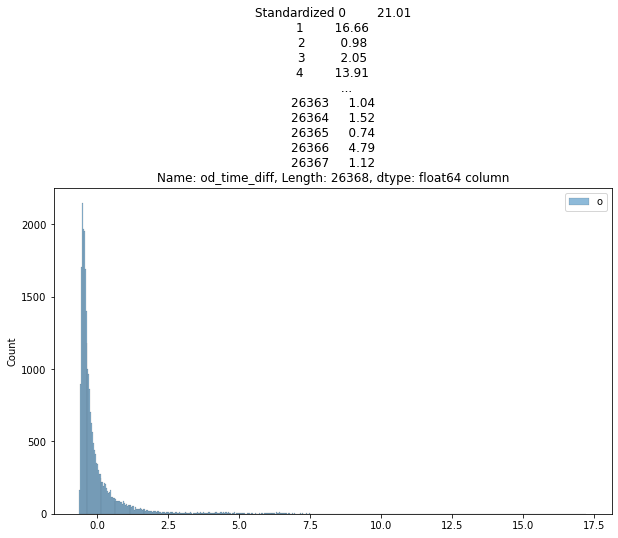

In [107]:
plt.figure(figsize = (10, 6))
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(encoded_data['od_time_diff'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {encoded_data['od_time_diff']} column")
plt.legend('od_time_diff')
plt.plot()

[]

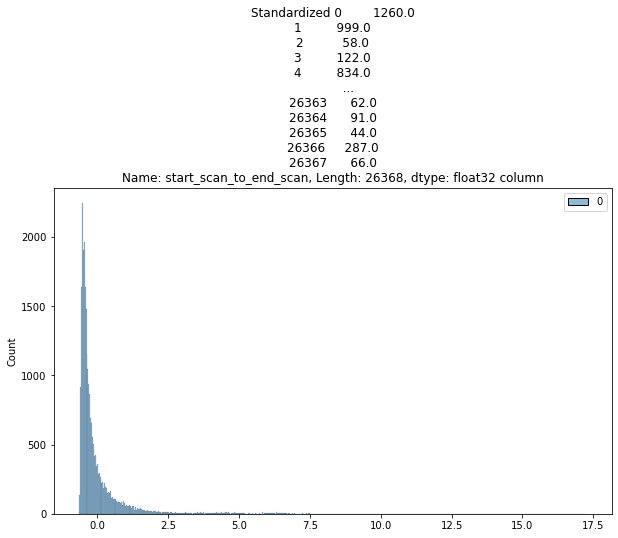

In [108]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(encoded_data['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {encoded_data['start_scan_to_end_scan']} column")
plt.plot()

[]

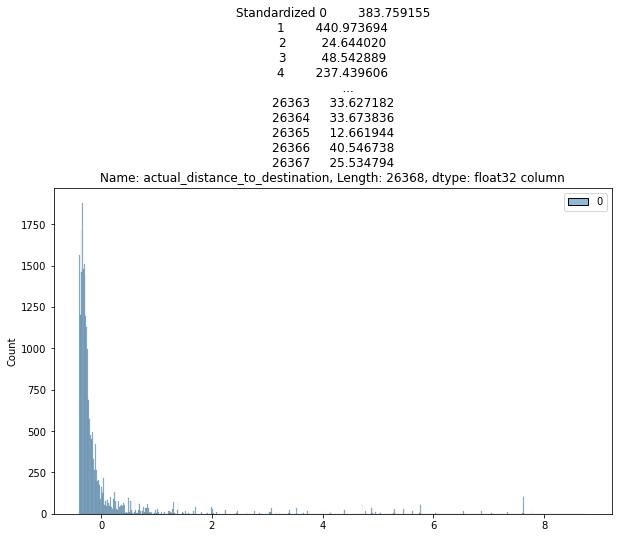

In [109]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(encoded_data['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {encoded_data['actual_distance_to_destination']} column")
plt.plot()

[]

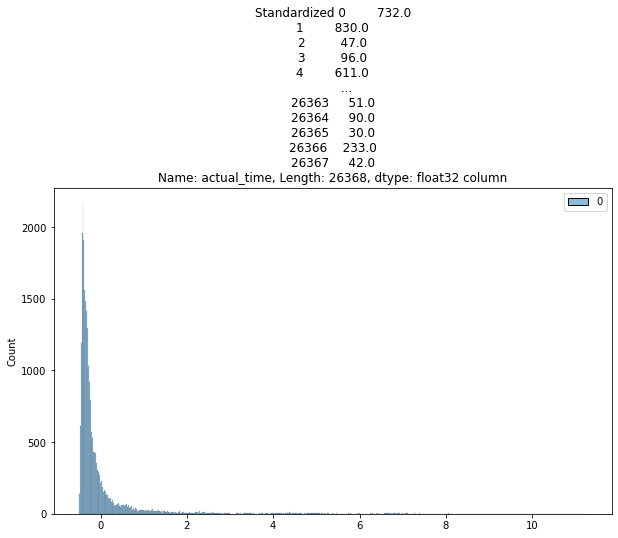

In [110]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(encoded_data['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {encoded_data['actual_time']} column")
plt.plot()

[]

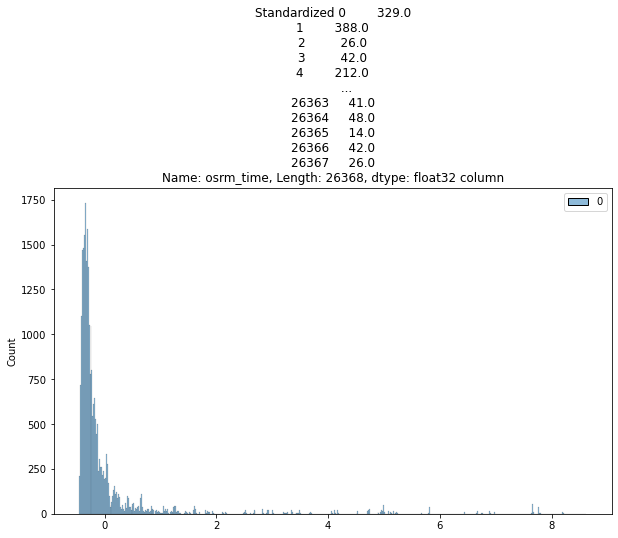

In [111]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(encoded_data['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {encoded_data['osrm_time']} column")
plt.plot()

[]

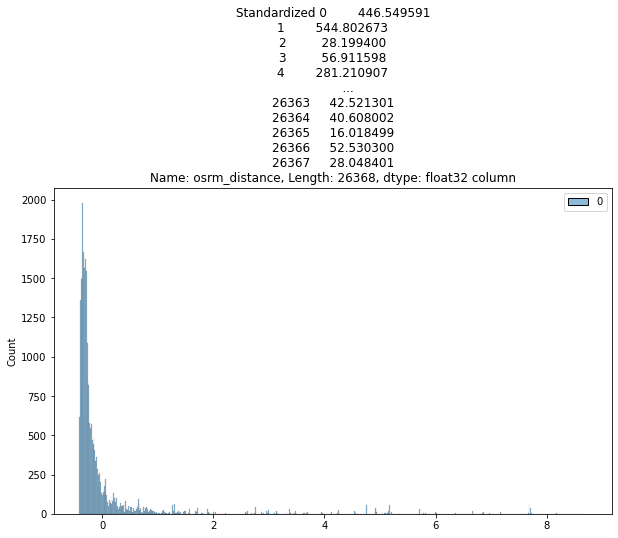

In [112]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(encoded_data['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {encoded_data['osrm_distance']} column")
plt.plot()

[]

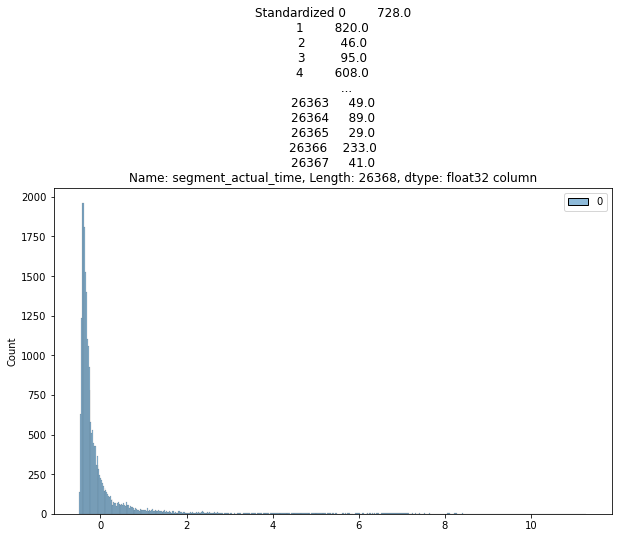

In [113]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(encoded_data['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {encoded_data['segment_actual_time']} column")
plt.plot()

[]

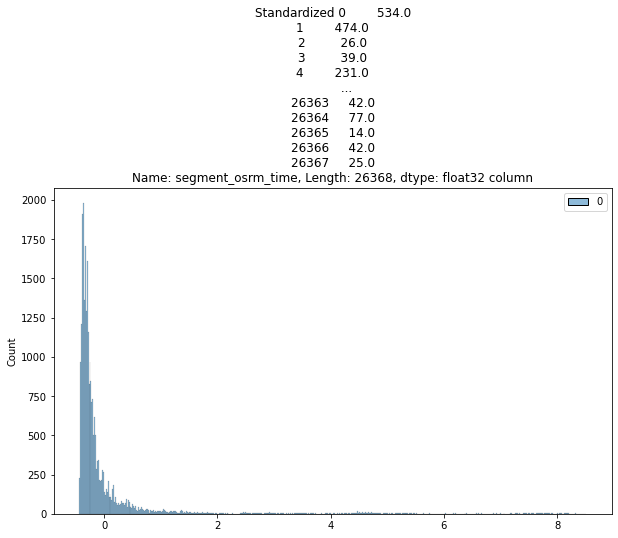

In [114]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(encoded_data['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {encoded_data['segment_osrm_time']} column")
plt.plot()

[]

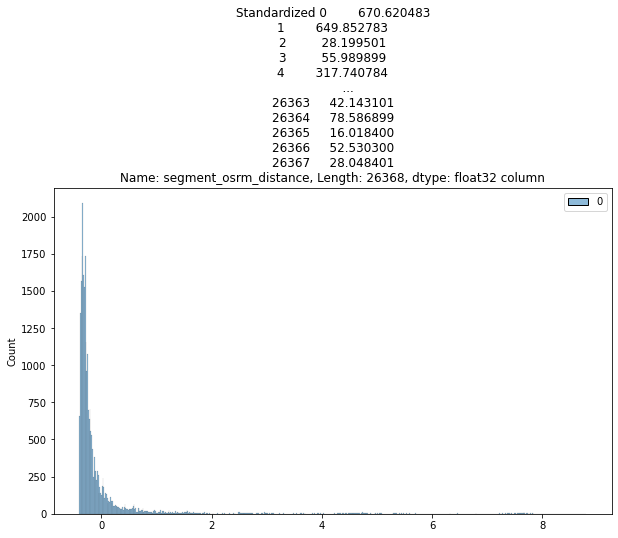

In [115]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(encoded_data['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {encoded_data['segment_osrm_distance']} column")
plt.plot()

# 5. Hypothesis Testing:
### Perform hypothesis testing / visual analysis between :
* actual_time aggregated value and OSRM time aggregated value.
* actual_time aggregated value and segment actual time aggregated
value.
* OSRM distance aggregated value and segment OSRM distance
aggregated value.
* OSRM time aggregated value and segment OSRM time aggregated
value.
* Note: Aggregated values are the values you’ll get after merging the rows on the
basis of trip_uuid.

In [116]:
# we will use seg_agg data for our hypothesis testing

### Hypothesis testing / visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of segment_key)

In [117]:
seg_agg_data[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,26368.000000,26368.000000
mean,200.690186,90.686707
std,384.854095,185.079559
min,9.000000,6.000000
25%,51.000000,25.000000
50%,84.000000,39.000000
75%,168.000000,72.000000
max,4532.000000,1686.000000


[]

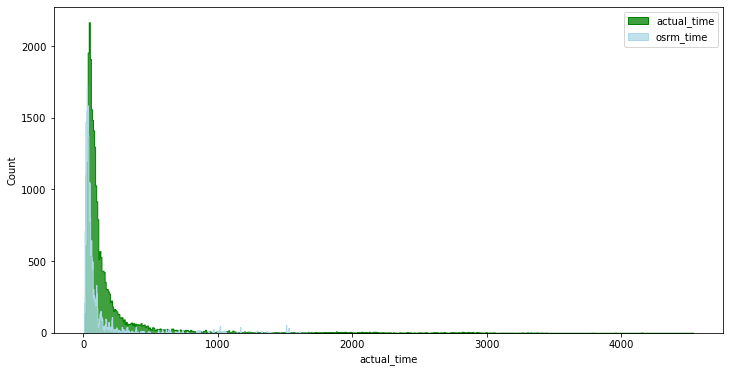

In [118]:
plt.figure(figsize = (12, 6))
sns.histplot(seg_agg_data['actual_time'], element = 'step', color = 'green')
sns.histplot(seg_agg_data['osrm_time'], element = 'step', color = 'lightblue')
plt.legend(['actual_time', 'osrm_time'])
plt.plot()

* Distribution check using **QQ Plot**

[]

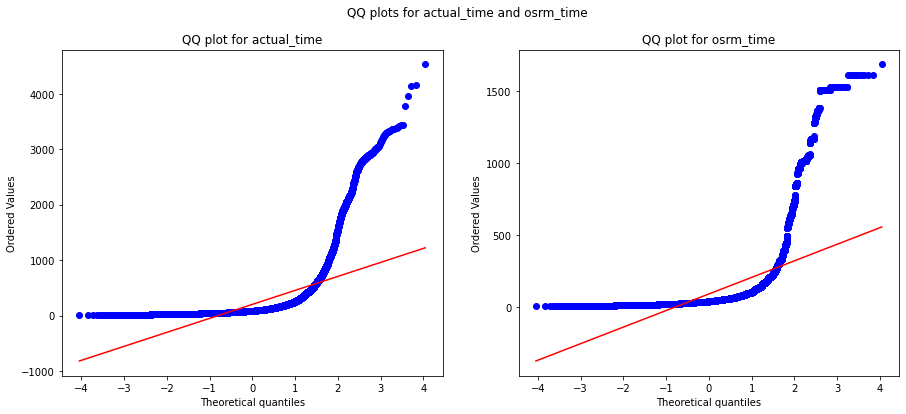

In [119]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
spy.probplot(seg_agg_data['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(seg_agg_data['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.plot()

###### It can be seen from the above plots that the samples do not come from normal distribution.

 - Applying Shapiro-Wilk test for normality


$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [120]:
test_stat, p_value = spy.shapiro(seg_agg_data['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

p-value 0.0
The sample does not follow normal distribution


In [121]:
test_stat, p_value = spy.shapiro(seg_agg_data['start_scan_to_end_scan'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 0.0
The sample does not follow normal distribution


 - Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [122]:
transformed_actual_time = spy.boxcox(seg_agg_data['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 3.599625466189942e-27
The sample does not follow normal distribution


C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [123]:
transformed_osrm_time = spy.boxcox(seg_agg_data['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.1461608973970853e-24
The sample does not follow normal distribution


 - Even after applying the boxcox transformation on each of the "actual_time" and "osrm_time" columns, the distributions do not follow normal distribution.

* Homogeneity of Variances using **Lavene's test**

##### Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [124]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(seg_agg_data['actual_time'], seg_agg_data['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 1.6971827666500026e-230
The samples do not have  Homogenous Variance


##### Since the samples do not follow any of the assumptions T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [125]:
test_stat, p_value = spy.mannwhitneyu(seg_agg_data['actual_time'], seg_agg_data['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 

p-value 0.0
The samples are not similar


###### Since p-value < alpha therfore it can be concluded that actual_time and osrm_time are not similar.

### Hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of segment_key)

[]

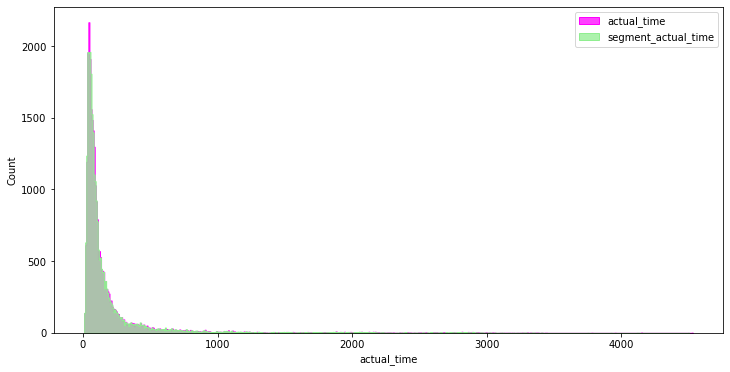

In [126]:
plt.figure(figsize = (12, 6))
sns.histplot(seg_agg_data['actual_time'], element = 'step', color = 'magenta')
sns.histplot(seg_agg_data['segment_actual_time'], element = 'step', color = 'lightgreen')
plt.legend(['actual_time', 'segment_actual_time'])
plt.plot()

[]

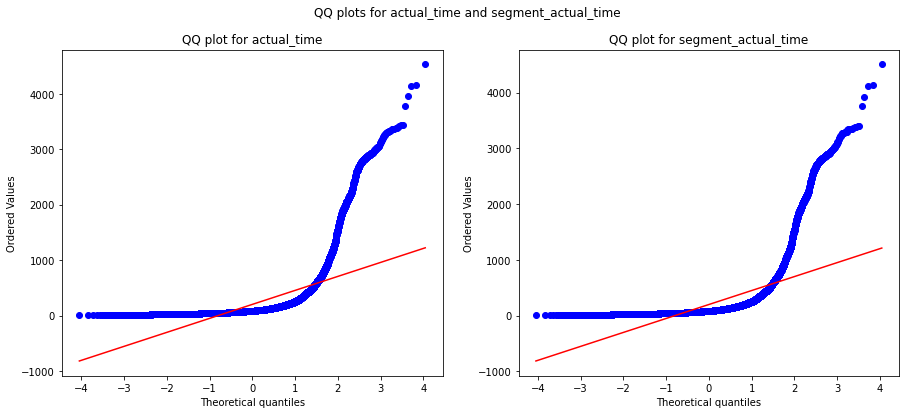

In [127]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_actual_time')
spy.probplot(seg_agg_data['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(seg_agg_data['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()

###### It can be seen from the above plots that the samples do not come from normal distribution.

 - Applying Shapiro-Wilk test for normality


$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [128]:
test_stat, p_value = spy.shapiro(seg_agg_data['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')   

p-value 0.0
The sample does not follow normal distribution


In [129]:
test_stat, p_value = spy.shapiro(seg_agg_data['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 0.0
The sample does not follow normal distribution


 - Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [130]:
transformed_actual_time = spy.boxcox(seg_agg_data['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 3.599625466189942e-27
The sample does not follow normal distribution


C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


transformed_segment_actual_time = spy.boxcox(seg_agg_data['segment_actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

 - Even after applying the boxcox transformation on each of the "actual_time" and "segment_actual_time" columns, the distributions do not follow normal distribution.

* Homogeneity of Variances using **Lavene's test**

In [131]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(seg_agg_data['actual_time'], seg_agg_data['segment_actual_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.698556074726726
The samples have Homogenous Variance 


##### Since the samples do not come from normal distribution T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [132]:
test_stat, p_value = spy.mannwhitneyu(seg_agg_data['actual_time'], seg_agg_data['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 

p-value 0.16011376950109157
The samples are similar 


###### Since p-value > alpha therfore it can be concluded that actual_time and segment_actual_time are similar.

### Hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of Segment_key)

[]

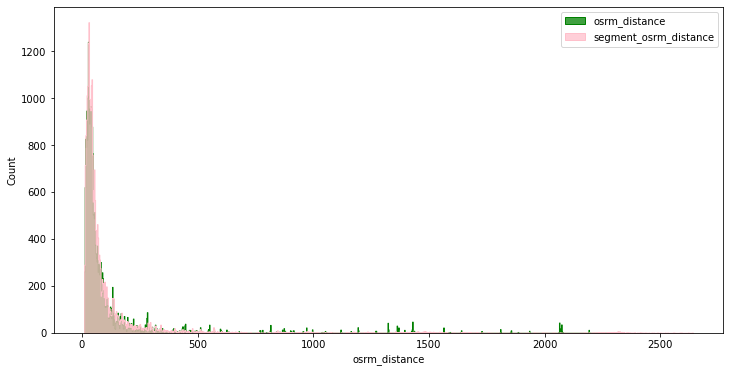

In [133]:
plt.figure(figsize = (12, 6))
sns.histplot(seg_agg_data['osrm_distance'], element = 'step', color = 'green', bins = 1000)
sns.histplot(seg_agg_data['segment_osrm_distance'], element = 'step', color = 'pink', bins = 1000)
plt.legend(['osrm_distance', 'segment_osrm_distance'])
plt.plot()

* Distribution check using **QQ Plot**

[]

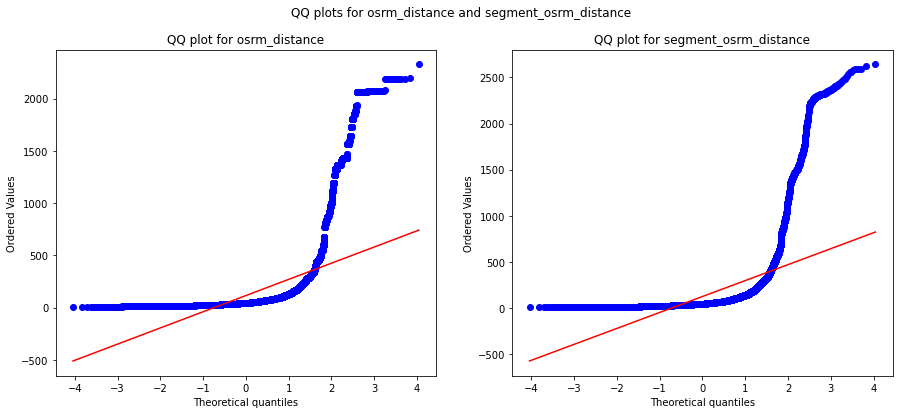

In [134]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
spy.probplot(seg_agg_data['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
spy.probplot(seg_agg_data['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.plot()

###### It can be seen from the above plots that the samples do not come from normal distribution.

 - Applying Shapiro-Wilk test for normality


$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [135]:
test_stat, p_value = spy.shapiro(seg_agg_data['osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

p-value 0.0
The sample does not follow normal distribution


In [136]:
test_stat, p_value = spy.shapiro(seg_agg_data['segment_osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 0.0
The sample does not follow normal distribution


 - Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [137]:
transformed_osrm_distance = spy.boxcox(seg_agg_data['osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 6.238992878797227e-29
The sample does not follow normal distribution


C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [138]:
transformed_segment_osrm_distance = spy.boxcox(seg_agg_data['segment_osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.01983769613568e-28
The sample does not follow normal distribution


 - Even after applying the boxcox transformation on each of the "osrm_distance" and "segment_osrm_distance" columns, the distributions do not follow normal distribution.

* Homogeneity of Variances using **Lavene's test**

In [139]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(seg_agg_data['osrm_distance'], seg_agg_data['segment_osrm_distance'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 3.006816339299108e-05
The samples do not have Homogenous Variance


##### Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [140]:
test_stat, p_value = spy.mannwhitneyu(seg_agg_data['osrm_distance'], seg_agg_data['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 

p-value 3.715809947282301e-10
The samples are not similar


###### Since p-value < alpha therfore it can be concluded that osrm_distance and segment_osrm_distance are  not similar.

### Hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of Segment_key)

[]

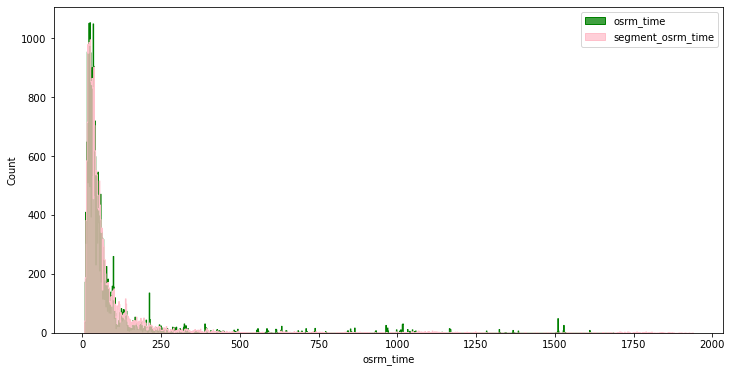

In [141]:
plt.figure(figsize = (12, 6))
sns.histplot(seg_agg_data['osrm_time'], element = 'step', color = 'green', bins = 1000)
sns.histplot(seg_agg_data['segment_osrm_time'], element = 'step', color = 'pink', bins = 1000)
plt.legend(['osrm_time', 'segment_osrm_time'])
plt.plot()

* Distribution check using **QQ Plot**

[]

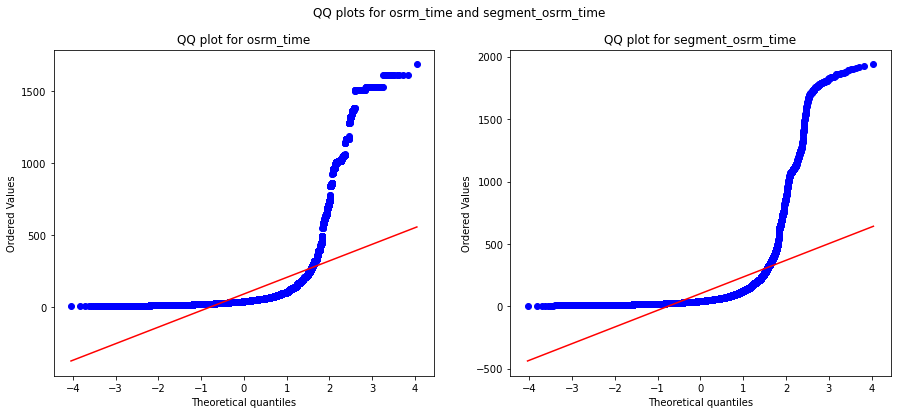

In [143]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
spy.probplot(seg_agg_data['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
spy.probplot(seg_agg_data['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.plot()

###### It can be seen from the above plots that the samples do not come from normal distribution.

 - Applying Shapiro-Wilk test for normality


$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [144]:
test_stat, p_value = spy.shapiro(seg_agg_data['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

p-value 0.0
The sample does not follow normal distribution


In [145]:
test_stat, p_value = spy.shapiro(seg_agg_data['segment_osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 0.0
The sample does not follow normal distribution


 - Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [146]:
transformed_osrm_time = spy.boxcox(seg_agg_data['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 3.1461608973970853e-24
The sample does not follow normal distribution


C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [147]:
transformed_segment_osrm_time = spy.boxcox(seg_agg_data['segment_osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.085097896474091e-23
The sample does not follow normal distribution


 - Even after applying the boxcox transformation on each of the "osrm_time" and "segment_osrm_time" columns, the distributions do not follow normal distribution.

* Homogeneity of Variances using **Lavene's test**

In [148]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(seg_agg_data['osrm_time'], seg_agg_data['segment_osrm_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 1.3076142539440769e-09
The samples do not have Homogenous Variance


##### Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [149]:
test_stat, p_value = spy.mannwhitneyu(seg_agg_data['osrm_time'], seg_agg_data['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 

p-value 2.3417605478672297e-11
The samples are not similar


###### Since p-value < alpha therfore it can be concluded that osrm_time and segment_osrm_time are  not similar.

## Business Insights 

 - The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.
 - There are about 14817 unique trip IDs, 1508 unique source centers, 1481 unique destination_centers, 
   690 unique source cities, 806 unique destination cities.
   
 - Most of the data is for testing than for training.
 - Most common route type is Carting.
 - The number of trips start increasing after the noon, becomes maximum at 10 P.M and then start decreasing.
 - Most orders come mid-month. That means customers usually make more orders in the mid of the month.
 - Most orders are sourced from the states like Maharashtra, Karnataka, Haryana, Tamil Nadu, Telangana
 - Maximum number of trips originated from Mumbai city followed by Gurgaon  Delhi, Bengaluru and Bhiwandi. That means that the seller base is strong in these cities.
 - Maximum number of trips ended in Karnataka state followed by Maharashtra, Haryana, Tamil Nadu and Uttar Pradesh. That means that the number of orders placed in these states is significantly high.
 - Maximum number of trips ended in BengaluruMumbai city followed by Mumbai , Gurgaon, Delhi and Chennai. That means that the number of orders placed in these cities is significantly high.
 - Most orders in terms of destination are coming from cities like bengaluru, mumbai, gurgaon, bangalore, Delhi.

 - Features start_scan_to_end_scan and od_total_time(created feature) are statistically similar.
 
 - Features actual_time & osrm_time are statitically different.
 
 - Features start_scan_to_end_scan and segment_actual_time are statistically similar.

 - Features osrm_distance and segment_osrm_distance are statistically different from each other.

 - Both the osrm_time & segment_osrm_time are not statistically same.

## Recommendations

 - The OSRM trip planning system needs to be improved. Discrepancies need to be catered to for transporters, if the routing engine is configured for optimum results.

 - osrm_time and actual_time are different. Team needs to make sure this difference is reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect an accurate delivery time.

 - The osrm distance and actual distance covered are also not same i.e. maybe the delivery person is not following the predefined route which may lead to late deliveries or the osrm devices is not properly predicting the route based on distance, traffic and other factors. Team needs to look into it.
 - Most of the orders are coming from/reaching to states like Maharashtra, Karnataka, Haryana and Tamil Nadu. The existing corridors can be further enhanced to improve the penetration in these areas.
 
 - Customer profiling of the customers belonging to the states Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh has to be done to get to know why major orders are coming from these atates and to improve customers' buying and delivery experience.
 
 - From state point of view, we might have very heavy traffic in certain states and bad terrain conditions in certain states. This will be a good indicator to plan and cater to demand during peak festival seasons.
 
 